In [1]:
%matplotlib notebook
import matplotlib
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np

# Jupyter Specifics
%matplotlib inline
from IPython.display import display, HTML
from ipywidgets.widgets import interact, interactive, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed
display(HTML("<style>.container { width:100% !important; }</style>"))
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [2]:
from Cluster import *

Getting data:
getting JHU data...
number of countries listed 274
done with JHU data.  Got  274 countries.
getting owid data...
data for population changes only slowly if at all in OWID database
done with owid data. Got 212 countries
WHO acute file found dictionary acute_who
ICU file found dictionary icus_2012
---------------------------------
Done with data.
---------------------------------
Getting deaths, case and testing data...
done.
doing piecwise linear fits to testing data ...
done.
making cases with nonlinear testing adjustment...
done.
to change the nonlinear correction function, call make_cases_adj_nonlin(K), K=2 by default


In [3]:
datasets = ['deaths','cases','cases_lin2020','cases_pwlfit','cases_nonlin']

d_countries = [c for c in clusdata_all['deaths']]
c_countries = [c for c in clusdata_all['cases']]
lc_countries = [c for c in clusdata_all['cases_lin2020']]
pc_countries = [c for c in clusdata_all['cases_pwlfit']]
nc_countries = [c for c in clusdata_all['cases_nonlin']]

countries = d_countries

In [4]:
# check that all country sets being used are the same and check time series lengths and starting dates
countrysets = [d_countries,c_countries,lc_countries,pc_countries,nc_countries]
print([len(ccs) for ccs in countrysets])
for ccs1 in countrysets:
    print([ccs1 == ccs2 for ccs2 in countrysets])
print([len(clusdata_all[d1]['United States']) for d1 in datasets])
print(len(total_deaths_x['dates']),len(total_cases_x['dates']),len(testing_x['dates']),total_deaths_x['dates'][0],total_cases_x['dates'][0],testing_x['dates'][0])

[59, 59, 59, 59, 59]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True]
[164, 164, 164, 164, 164]
266 266 266 12/31/19 12/31/19 12/31/19


In [5]:
len(testing_x['dates'])

266

# ClusterFit testing

In [6]:
np.argsort(list(range(4,14)))[-1:][0]

9

16000 2 seats

In [7]:

base = '../../covid-19-JH/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_jhu = get_data(base+'time_series_covid19_confirmed_global.csv')
deaths_jhu = get_data(base+'time_series_covid19_deaths_global.csv')

In [8]:
[x for x in dir() if 'death' in x]

['deaths',
 'deaths_jhu',
 'deaths_owid',
 'deaths_raw',
 'new_deaths_spm',
 'new_deaths_spm_x',
 'short_deaths',
 'short_deaths_c',
 'short_deaths_est',
 'total_deaths',
 'total_deaths_x']

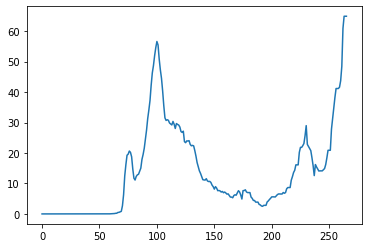

In [9]:
plt.plot(new_cases_spm['Denmark'])

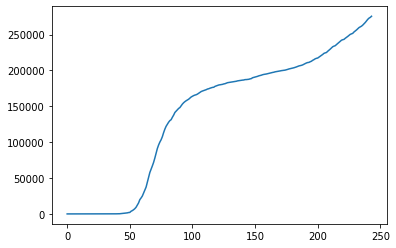

In [10]:

plt.plot(confirmed_jhu[('Germany','')])

## cases

In [11]:
len(clusdata_all['cases'])

59

In [12]:
#foo = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
foo = ClusterFit(clusdata_all['cases'],fft=None) 

hdbscan found 3 clusters.
mean cluster membership probability = 0.8573940341097055


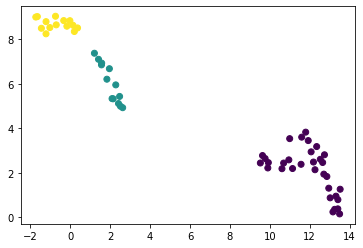

In [13]:
foo.umap_cluster(5,5,n_neighbors=6)
print('mean cluster membership probability =',np.mean(foo.clus_probs))
foo.plot_umap()

In [14]:
foo.clus_labels
print(len(foo.clus_labels))
print(len(c_countries))

59
59


In [15]:
foo.clus_labels

array([1, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 2,
       2, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0,
       2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 0])

In [16]:
labelled = [(foo.clus_labels[i],c_countries[i]) for i in range(len(foo.clus_labels))]
print(labelled)

[(1, 'Afghanistan'), (0, 'Albania'), (0, 'Algeria'), (0, 'Argentina'), (1, 'Armenia'), (0, 'Australia'), (2, 'Austria'), (1, 'Azerbaijan'), (1, 'Belarus'), (2, 'Belgium'), (0, 'Bosnia and Herzegovina'), (0, 'Brazil'), (0, 'Bulgaria'), (1, 'Canada'), (0, 'Colombia'), (0, 'Croatia'), (0, 'Czech Republic'), (2, 'Denmark'), (0, 'Dominican Republic'), (0, 'Ecuador'), (1, 'Egypt'), (2, 'Finland'), (2, 'France'), (2, 'Germany'), (0, 'Honduras'), (2, 'Hungary'), (0, 'India'), (0, 'Iran'), (0, 'Iraq'), (2, 'Ireland'), (0, 'Israel'), (1, 'Italy'), (0, 'Kazakhstan'), (0, 'Lebanon'), (0, 'Macedonia'), (0, 'Mexico'), (0, 'Moldova'), (0, 'Morocco'), (2, 'Netherlands'), (2, 'Norway'), (1, 'Pakistan'), (0, 'Panama'), (0, 'Philippines'), (0, 'Poland'), (2, 'Portugal'), (0, 'Puerto Rico'), (0, 'Romania'), (1, 'Russia'), (1, 'Saudi Arabia'), (0, 'Serbia'), (0, 'South Africa'), (2, 'Spain'), (1, 'Sweden'), (2, 'Switzerland'), (2, 'Turkey'), (0, 'Ukraine'), (1, 'United Arab Emirates'), (1, 'United Kingdom'

In [17]:
np.lexsort((c_countries,foo.clus_labels))

array([ 1,  2,  3,  5, 10, 11, 12, 14, 15, 16, 18, 19, 24, 26, 27, 28, 30,
       32, 33, 34, 35, 36, 37, 41, 42, 43, 45, 46, 49, 50, 55, 58,  0,  4,
        7,  8, 13, 20, 31, 40, 47, 48, 52, 56, 57,  6,  9, 17, 21, 22, 23,
       25, 29, 38, 39, 44, 51, 53, 54])

In [18]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=4,n_neighbors=6)

found 14 clusters of size 4


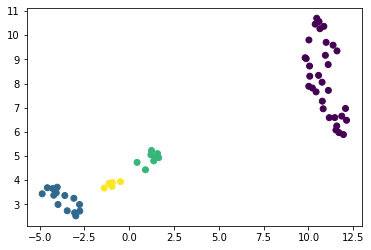

In [19]:
foo.plot_umap()

In [20]:
np.mean(foo.clus_probs)

0.9670462865424165

In [21]:
foo.clus_labels

array([2, 0, 0, 0, 2, 0, 1, 2, 3, 1, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0,
       1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 0, 3, 3, 0])

sorting countries according to cluster labels


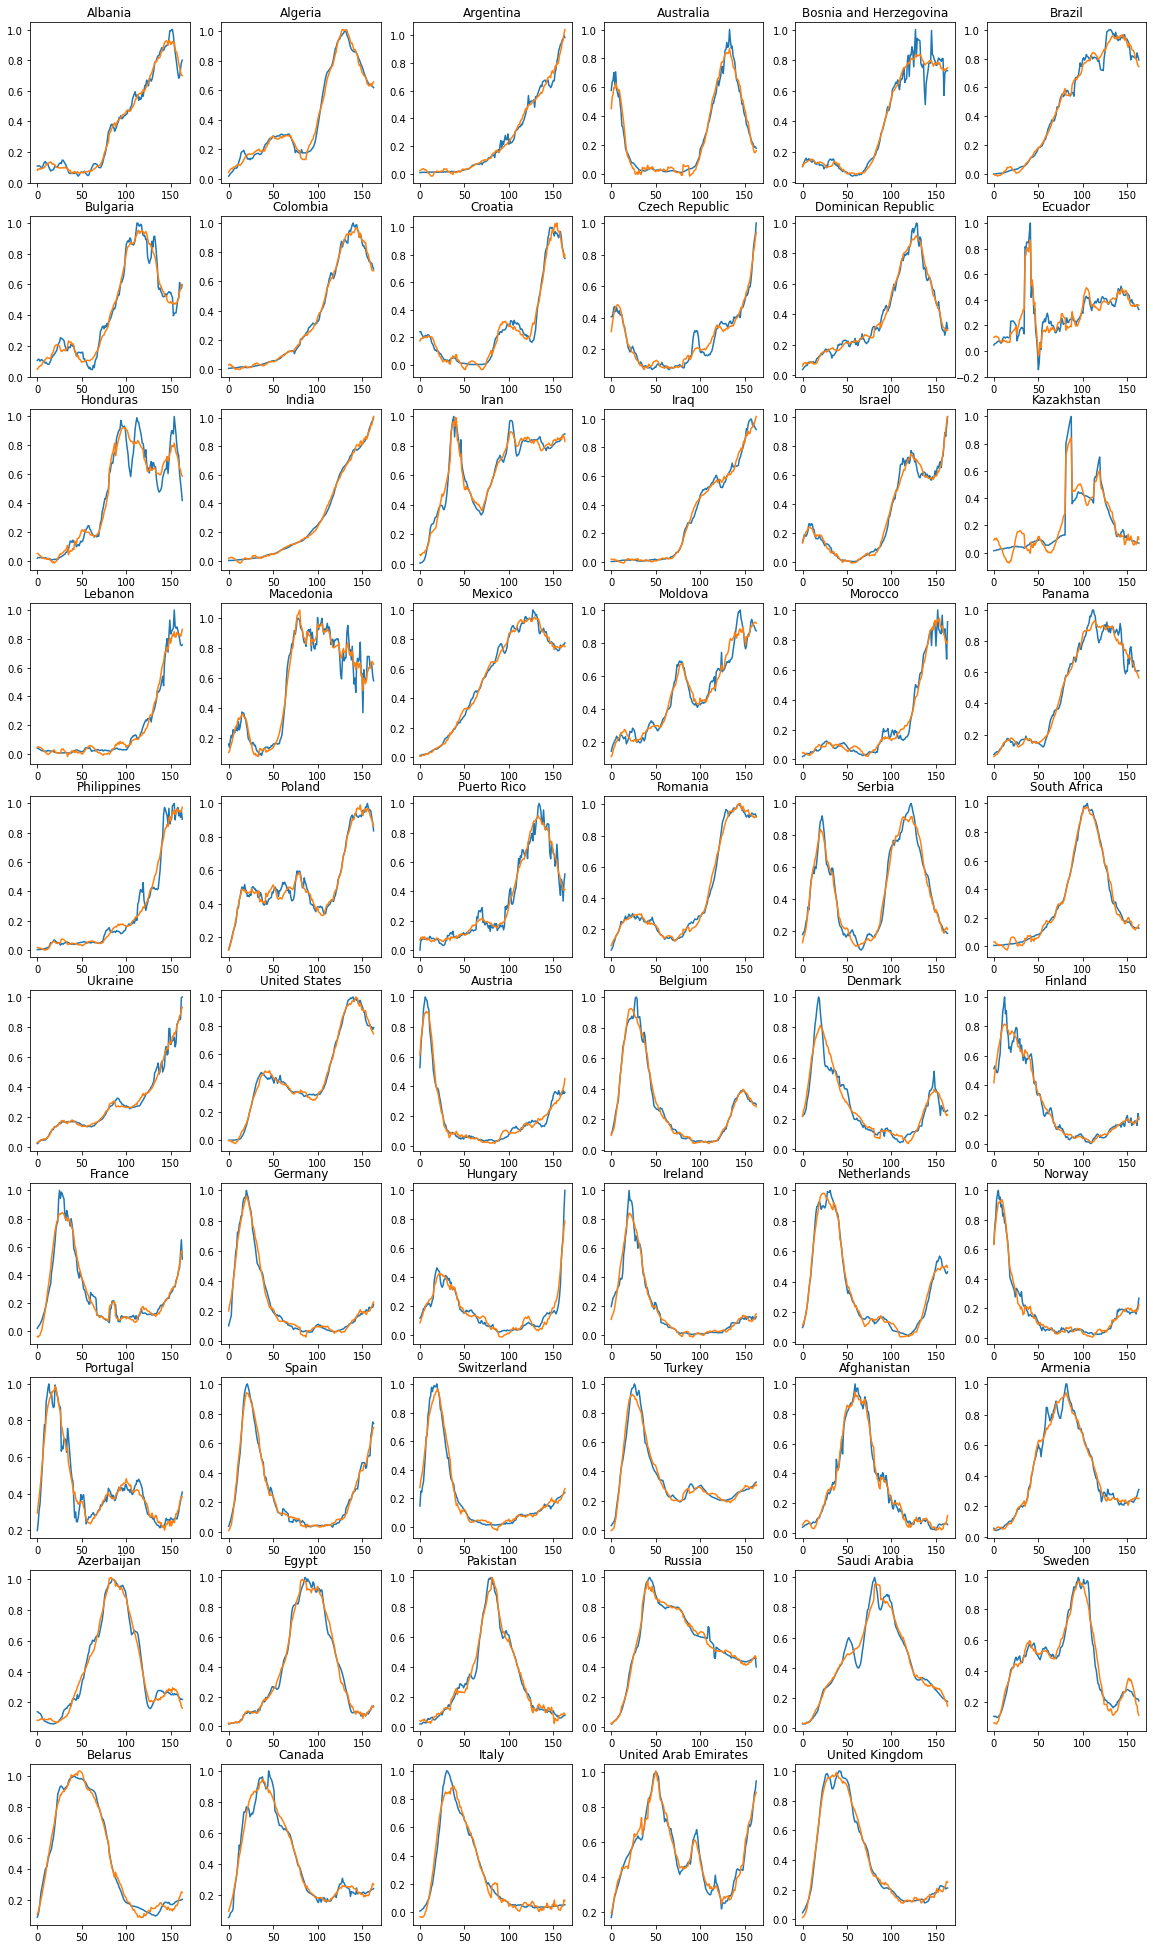

In [22]:
foo.cluster_plot_all()

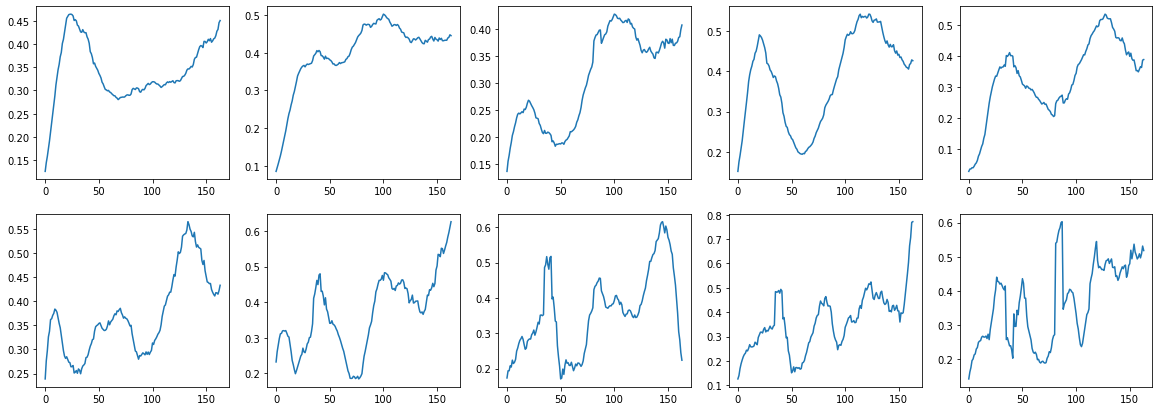

In [23]:
foo.plot_pcas()

In [24]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

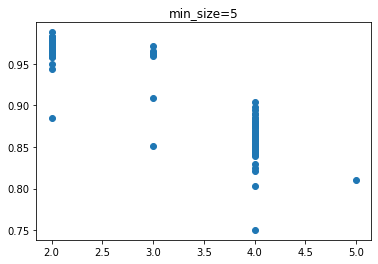

In [25]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

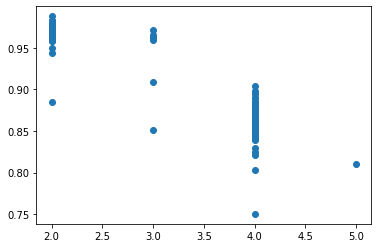

In [26]:
# min_size = 6
plt.scatter(clsize,clprobs)

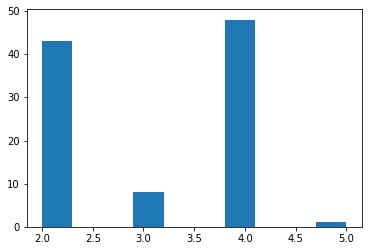

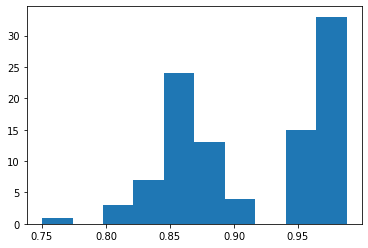

In [27]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

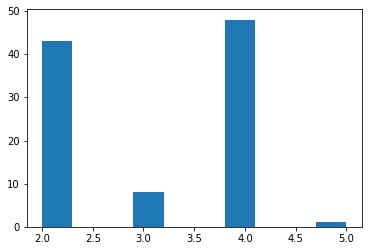

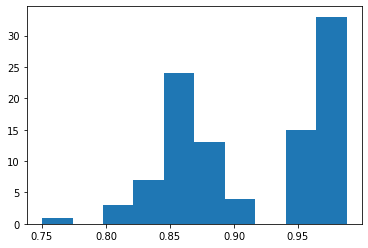

In [28]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

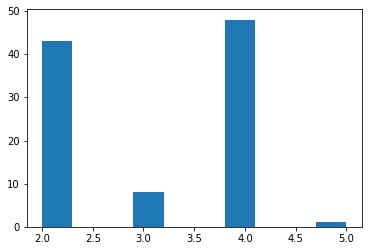

In [29]:
plt.hist(clsize);

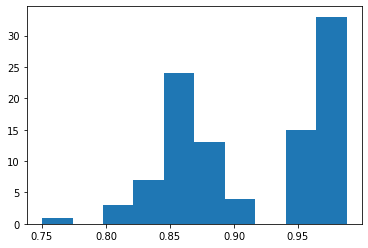

In [30]:
plt.hist(clprobs);

In [31]:
clusfit_all = {}
clusfit_all['cases'] = foo

## cases FFT

In [32]:
len(clusdata_all['cases'])

59

In [33]:
foofft = ClusterFit(clusdata_all['cases'],fft='fft') # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['cases'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['cases'],fft=None) 

hdbscan found 2 clusters.
mean cluster membership probability = 0.9264168881326762


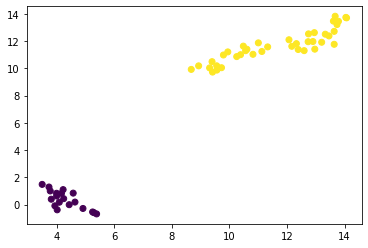

In [34]:
foofft.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foofft.plot_umap()

In [35]:
# foo.umap_best_cluster(Nclus=3)
foofft.umap_best_cluster()

found 3 clusters of size 3


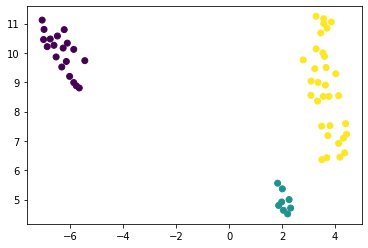

In [36]:
foofft.plot_umap()

In [37]:
np.mean(foofft.clus_probs)

0.9123186868459869

In [38]:
foofft.clus_labels

array([1, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0,
       0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 2,
       0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0, 2])

sorting countries according to cluster labels


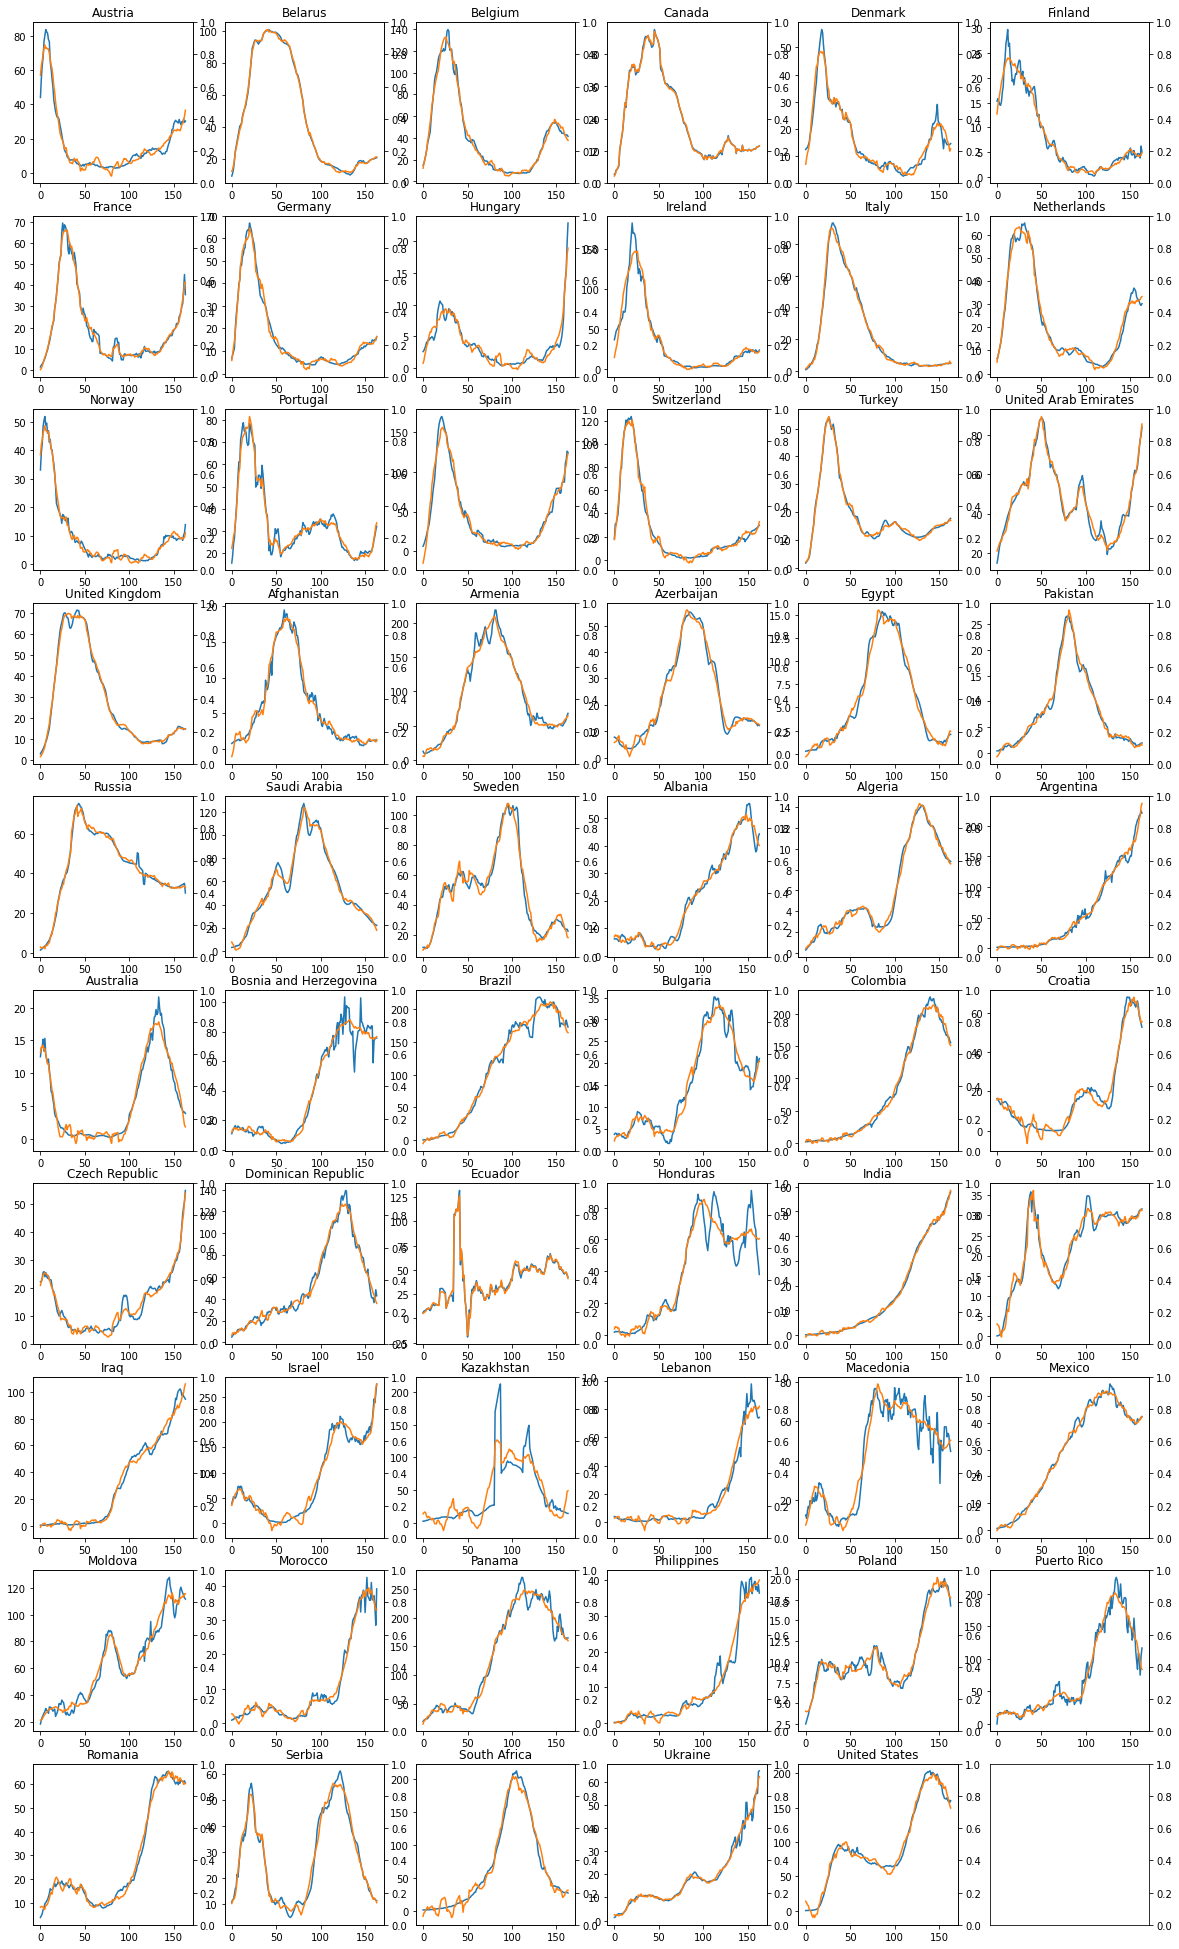

In [39]:
foofft.cluster_plot_all()

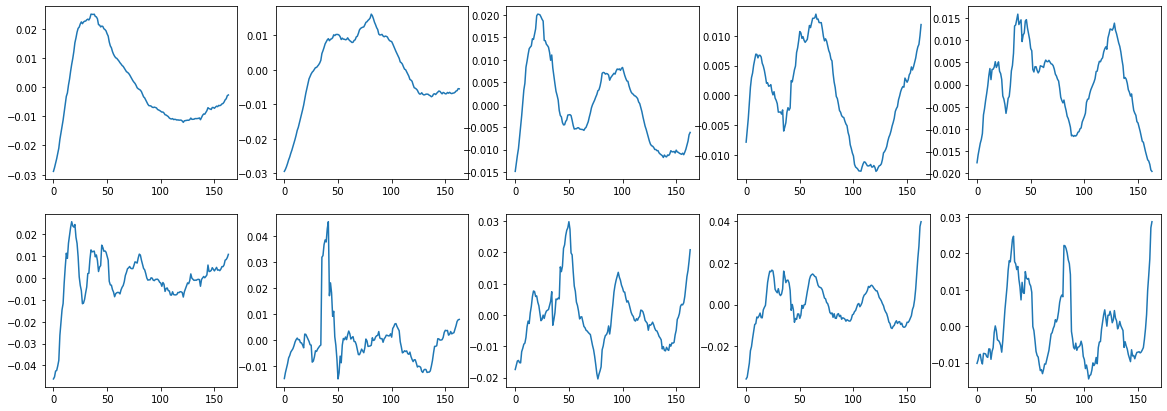

In [40]:
foofft.plot_pcas()

In [41]:
clsize = []
clprobs = []
for i in range(100):
    foofft.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foofft.clus_labels)))
    clprobs.append(np.mean(foofft.clus_probs))

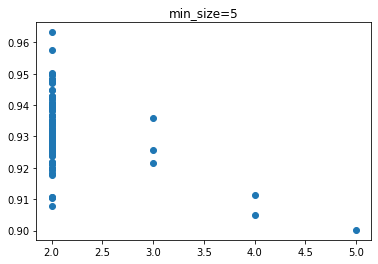

In [42]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

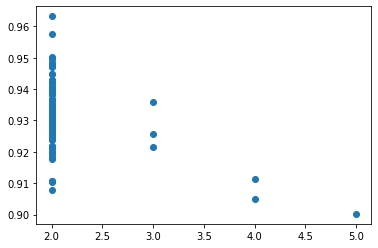

In [43]:
# min_size = 6
plt.scatter(clsize,clprobs)

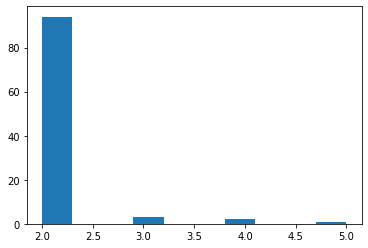

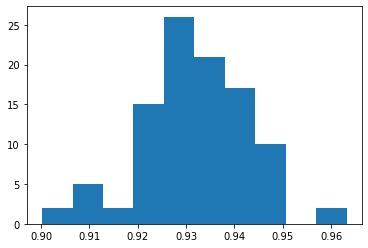

In [44]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

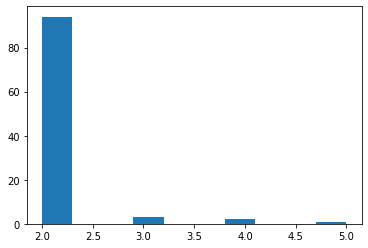

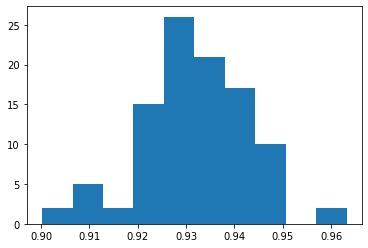

In [45]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

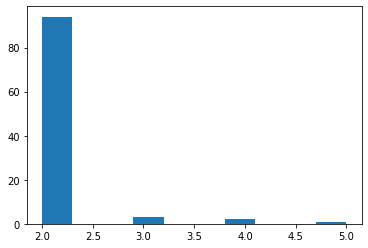

In [46]:
plt.hist(clsize);

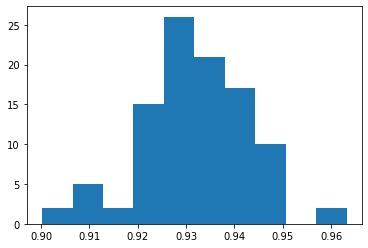

In [47]:
plt.hist(clprobs);

In [48]:
clusfit_all = {}
clusfit_all['cases'] = foofft

## deaths

In [159]:
len(clusdata_all['deaths'])

59

In [160]:
foo = ClusterFit(clusdata_all['deaths']) # real and imag components of FFT used together for PCA
#foo = ClusterFit(clusdata_all['deaths'],fft='powfft') # power spectrum via FFT used for PCA (not invertible)
#foo = ClusterFit(clusdata_all['deaths'],fft=None) 

hdbscan found 3 clusters.
mean cluster membership probability = 0.9287150524240285


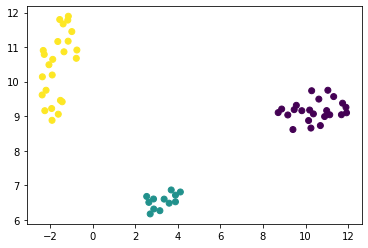

In [161]:
foo.umap_cluster(5,5)
print('mean cluster membership probability =',np.mean(foofft.clus_probs))
foo.plot_umap()

In [162]:
# foo.umap_best_cluster(Nclus=3)
foo.umap_best_cluster(Nclus=3)

found 50 clusters of size 3


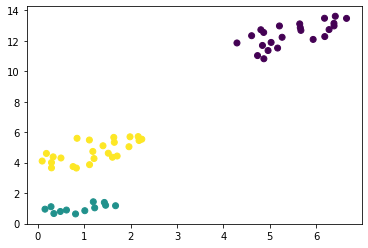

In [163]:
foo.plot_umap()

In [164]:
np.mean(foo.clus_probs)

0.972484255433311

sorting countries according to cluster labels


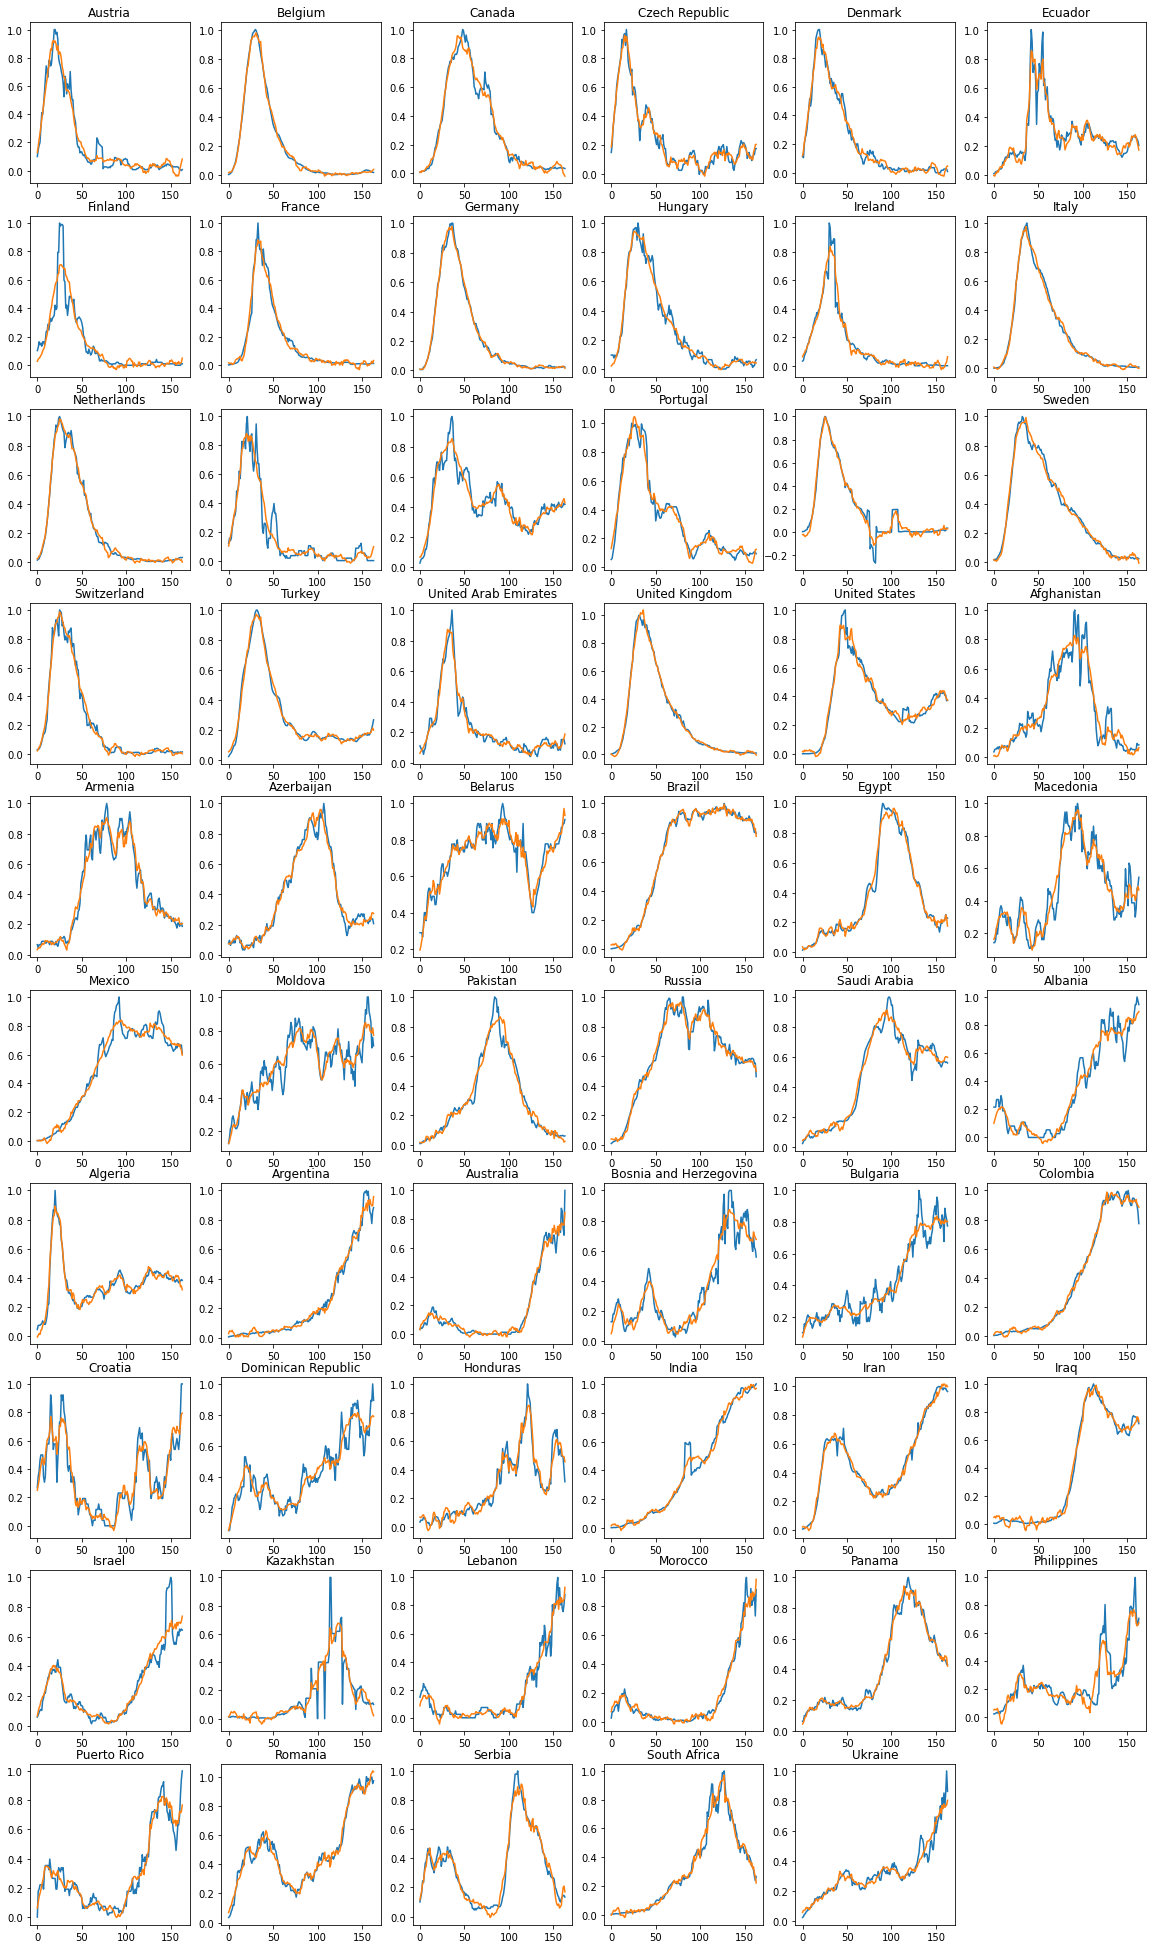

In [165]:
foo.cluster_plot_all()

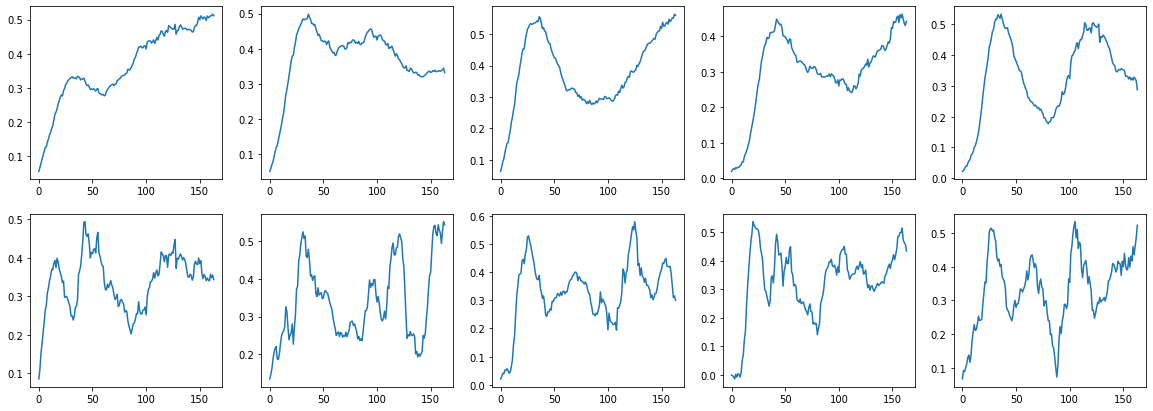

In [166]:
foo.plot_pcas()

In [167]:
clsize = []
clprobs = []
for i in range(100):
    foo.umap_cluster(i,min_size=5,diag=False)
    clsize.append(len(set(foo.clus_labels)))
    clprobs.append(np.mean(foo.clus_probs))

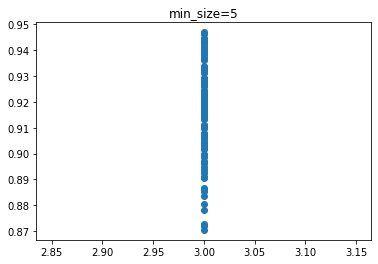

In [168]:
plt.scatter(clsize,clprobs)
plt.title('min_size=5');

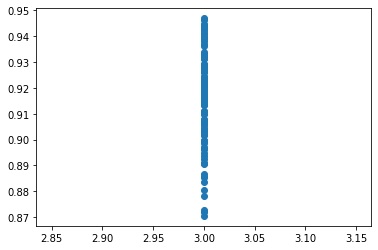

In [169]:
# min_size = 6
plt.scatter(clsize,clprobs)

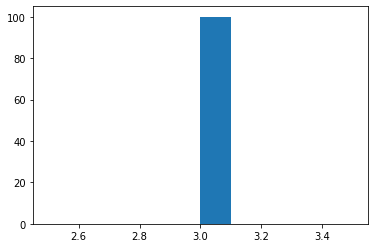

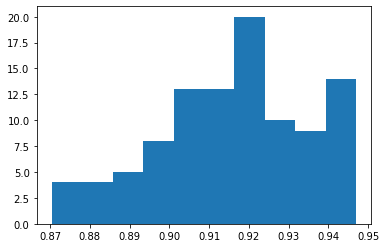

In [170]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

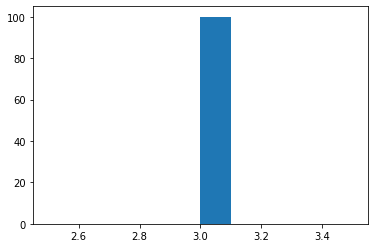

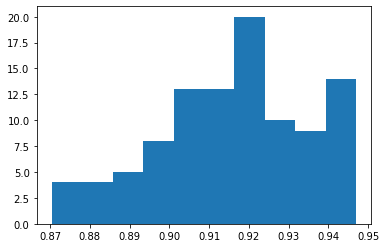

In [171]:
plt.hist(clsize);
plt.show()
plt.hist(clprobs);

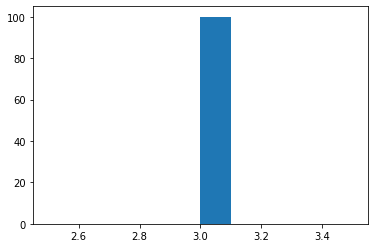

In [172]:
plt.hist(clsize);

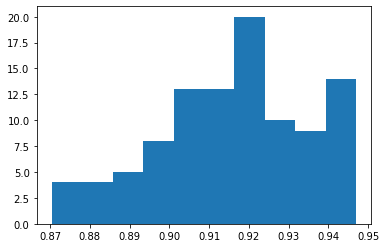

In [173]:
plt.hist(clprobs);

In [174]:
clusfit_all = {}
clusfit_all['cases'] = foo

## deaths FFT

In [155]:
foofft = ClusterFit(clusdata_all['deaths'],fft='fft')

In [156]:
foofft.umap_cluster(3) # arg = random seed

hdbscan found 2 clusters.


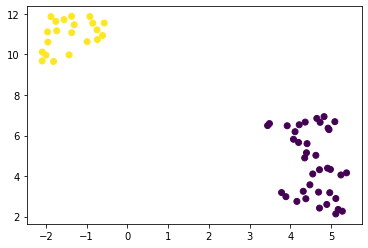

In [157]:
foofft.plot_umap()

In [158]:
foofft.umap_best_cluster()

KeyboardInterrupt: 

In [ ]:
foofft.plot_umap()

In [ ]:
foofft.plot_pcas()

In [ ]:
clusfit_all['deaths'] = foofft

# Plots of all countries

In [ ]:
plot_all(countries,clusdata_all['deaths'])

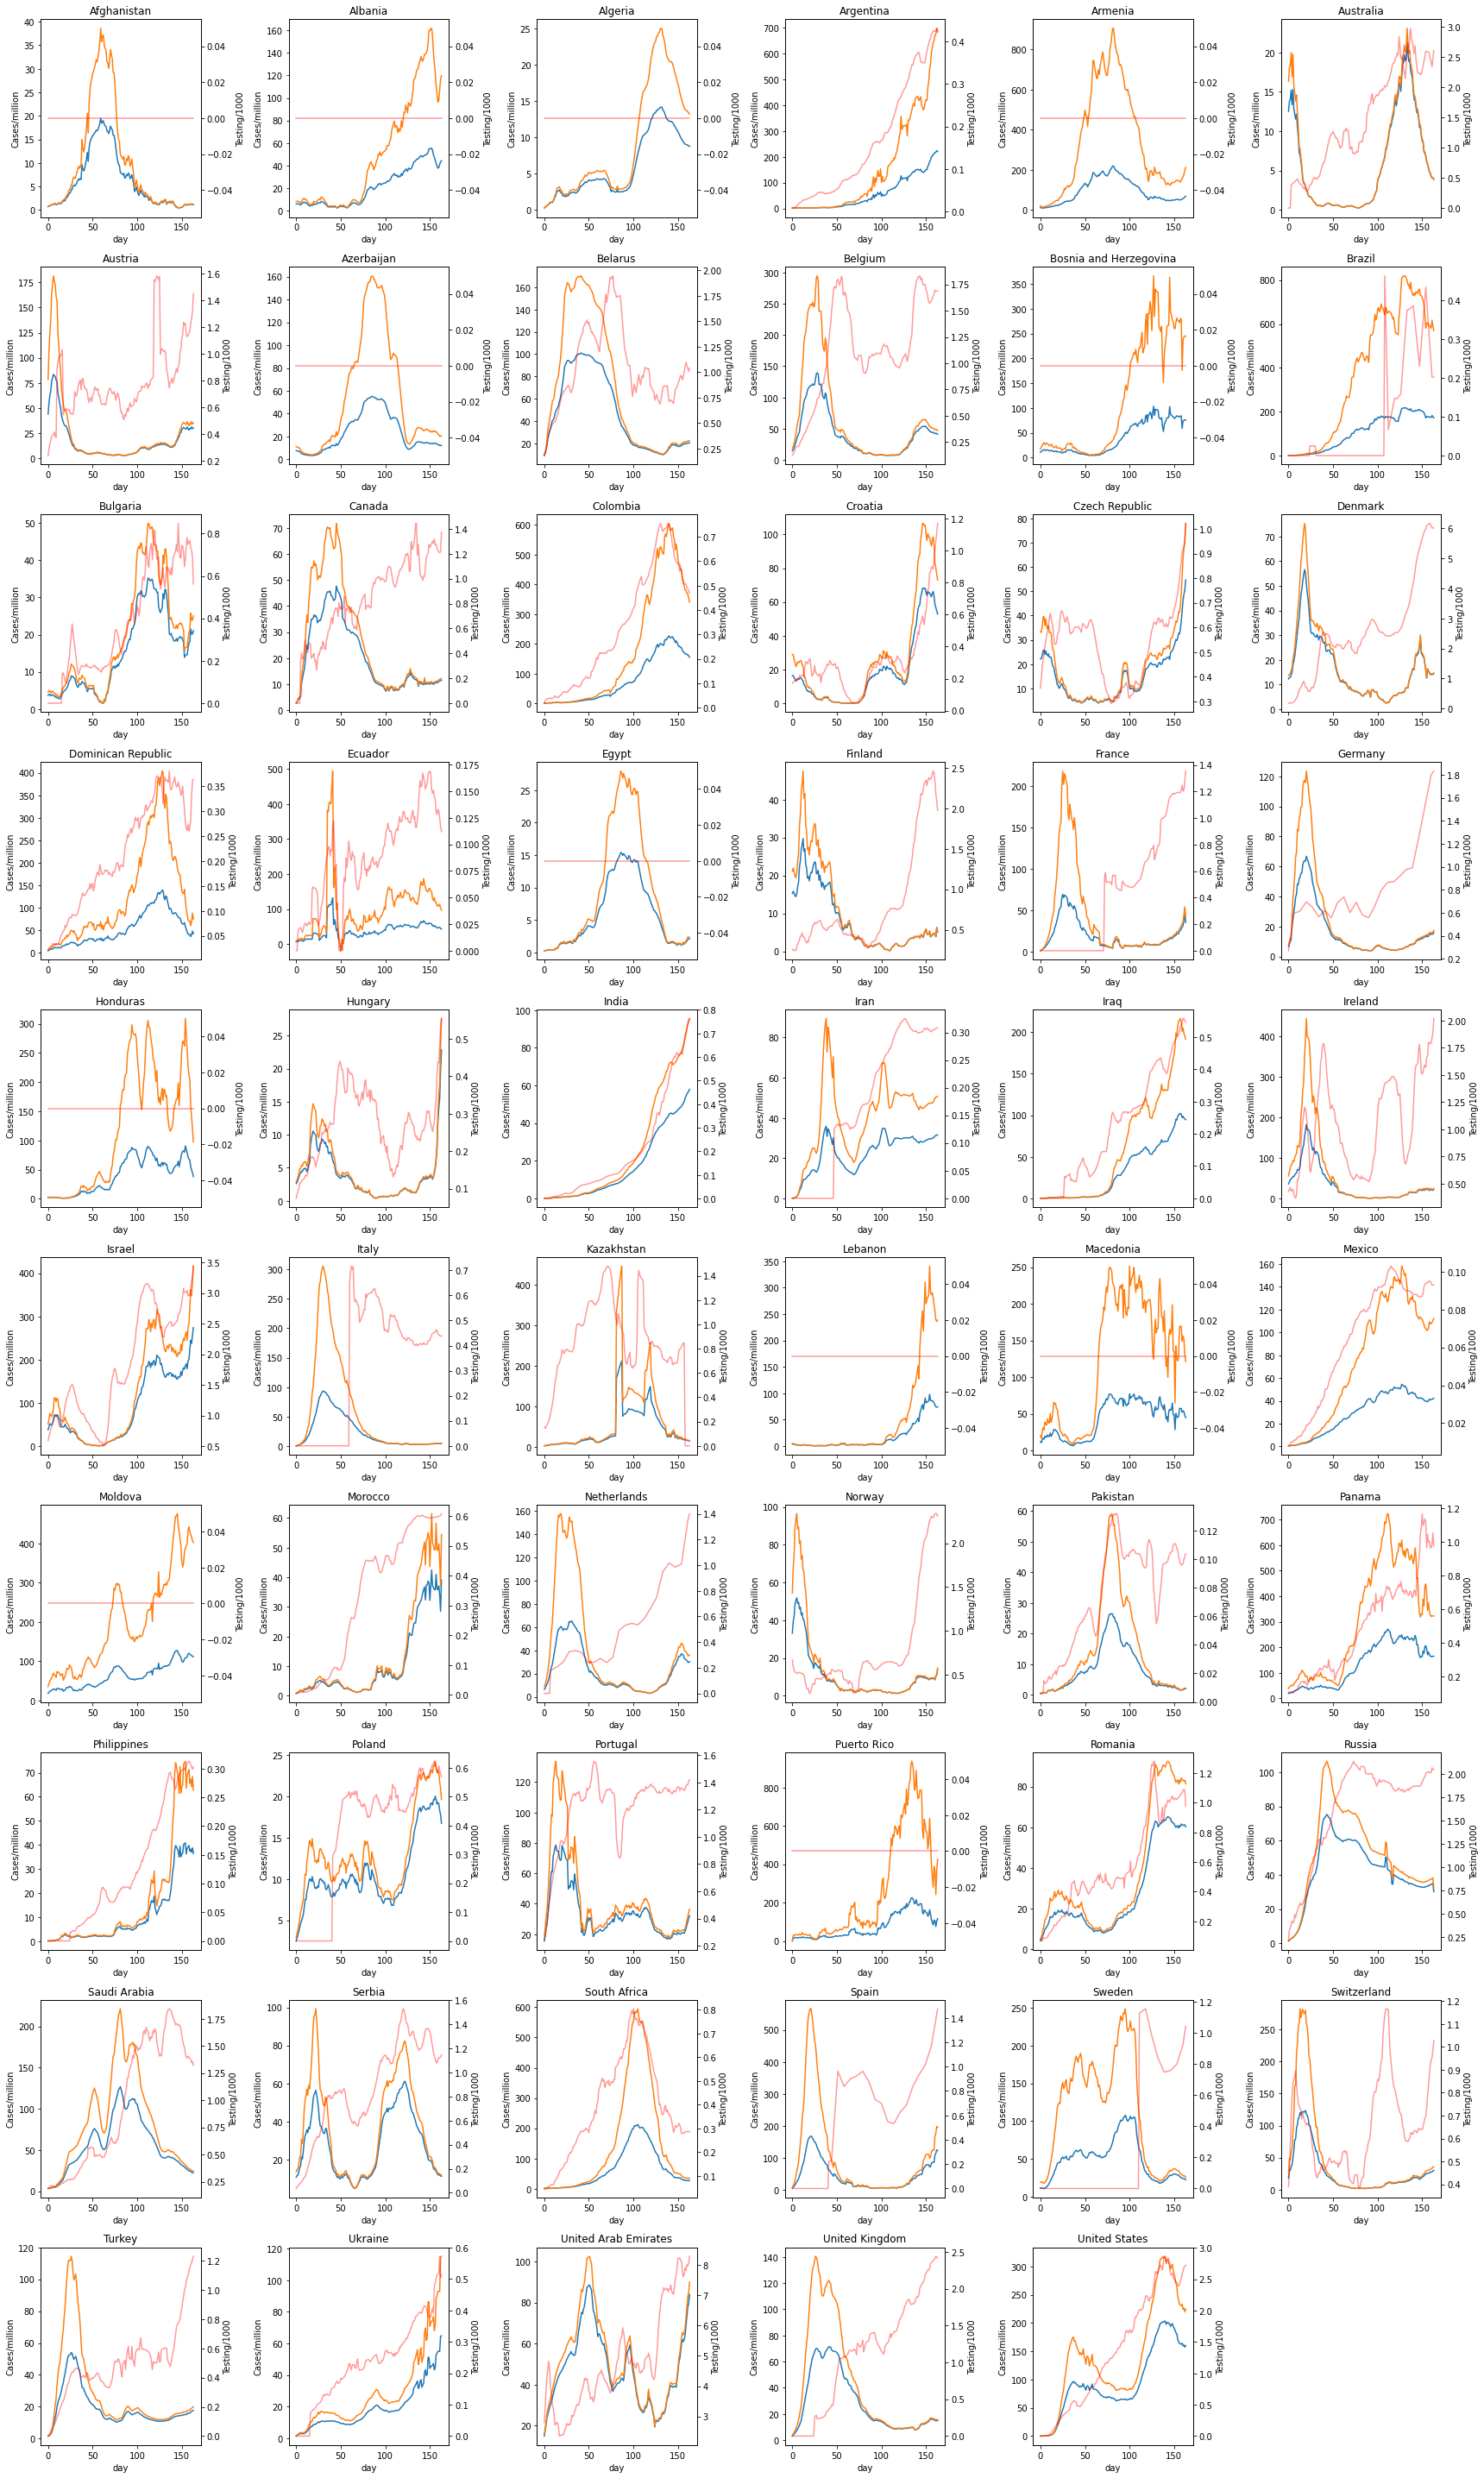

In [110]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlin'],longshort_testing_c)

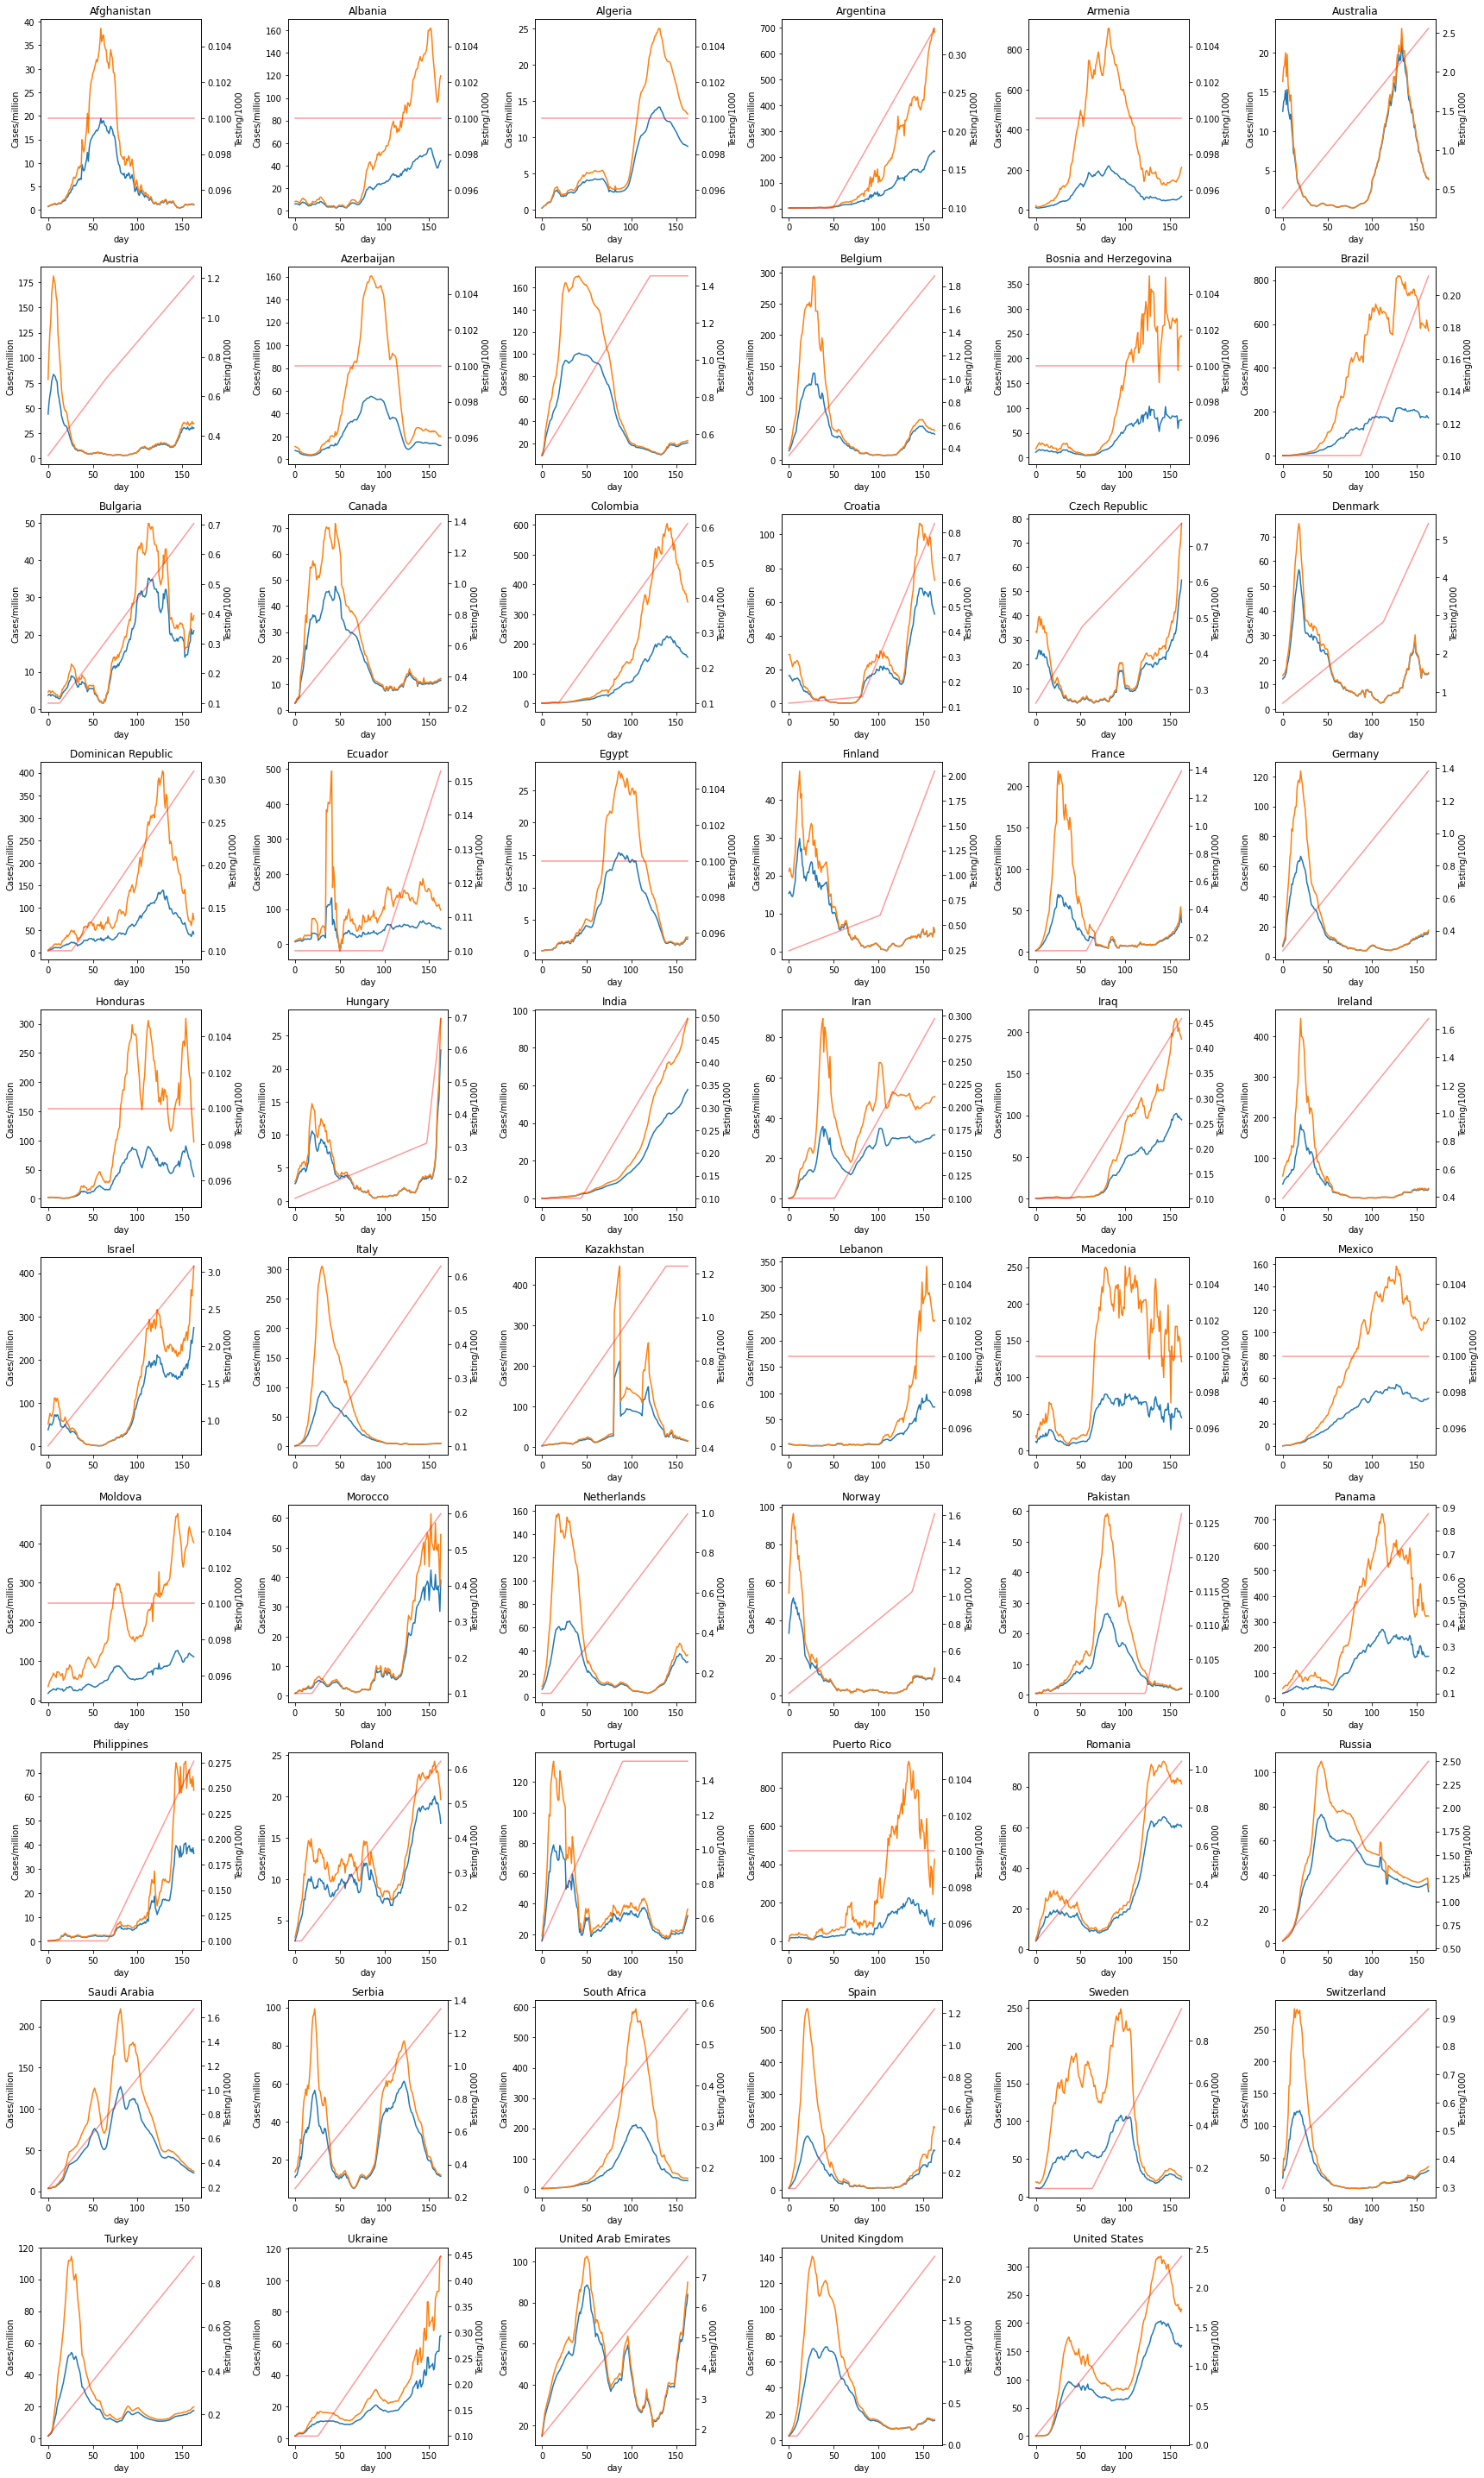

In [111]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr'],longshort_reg_testing_c)

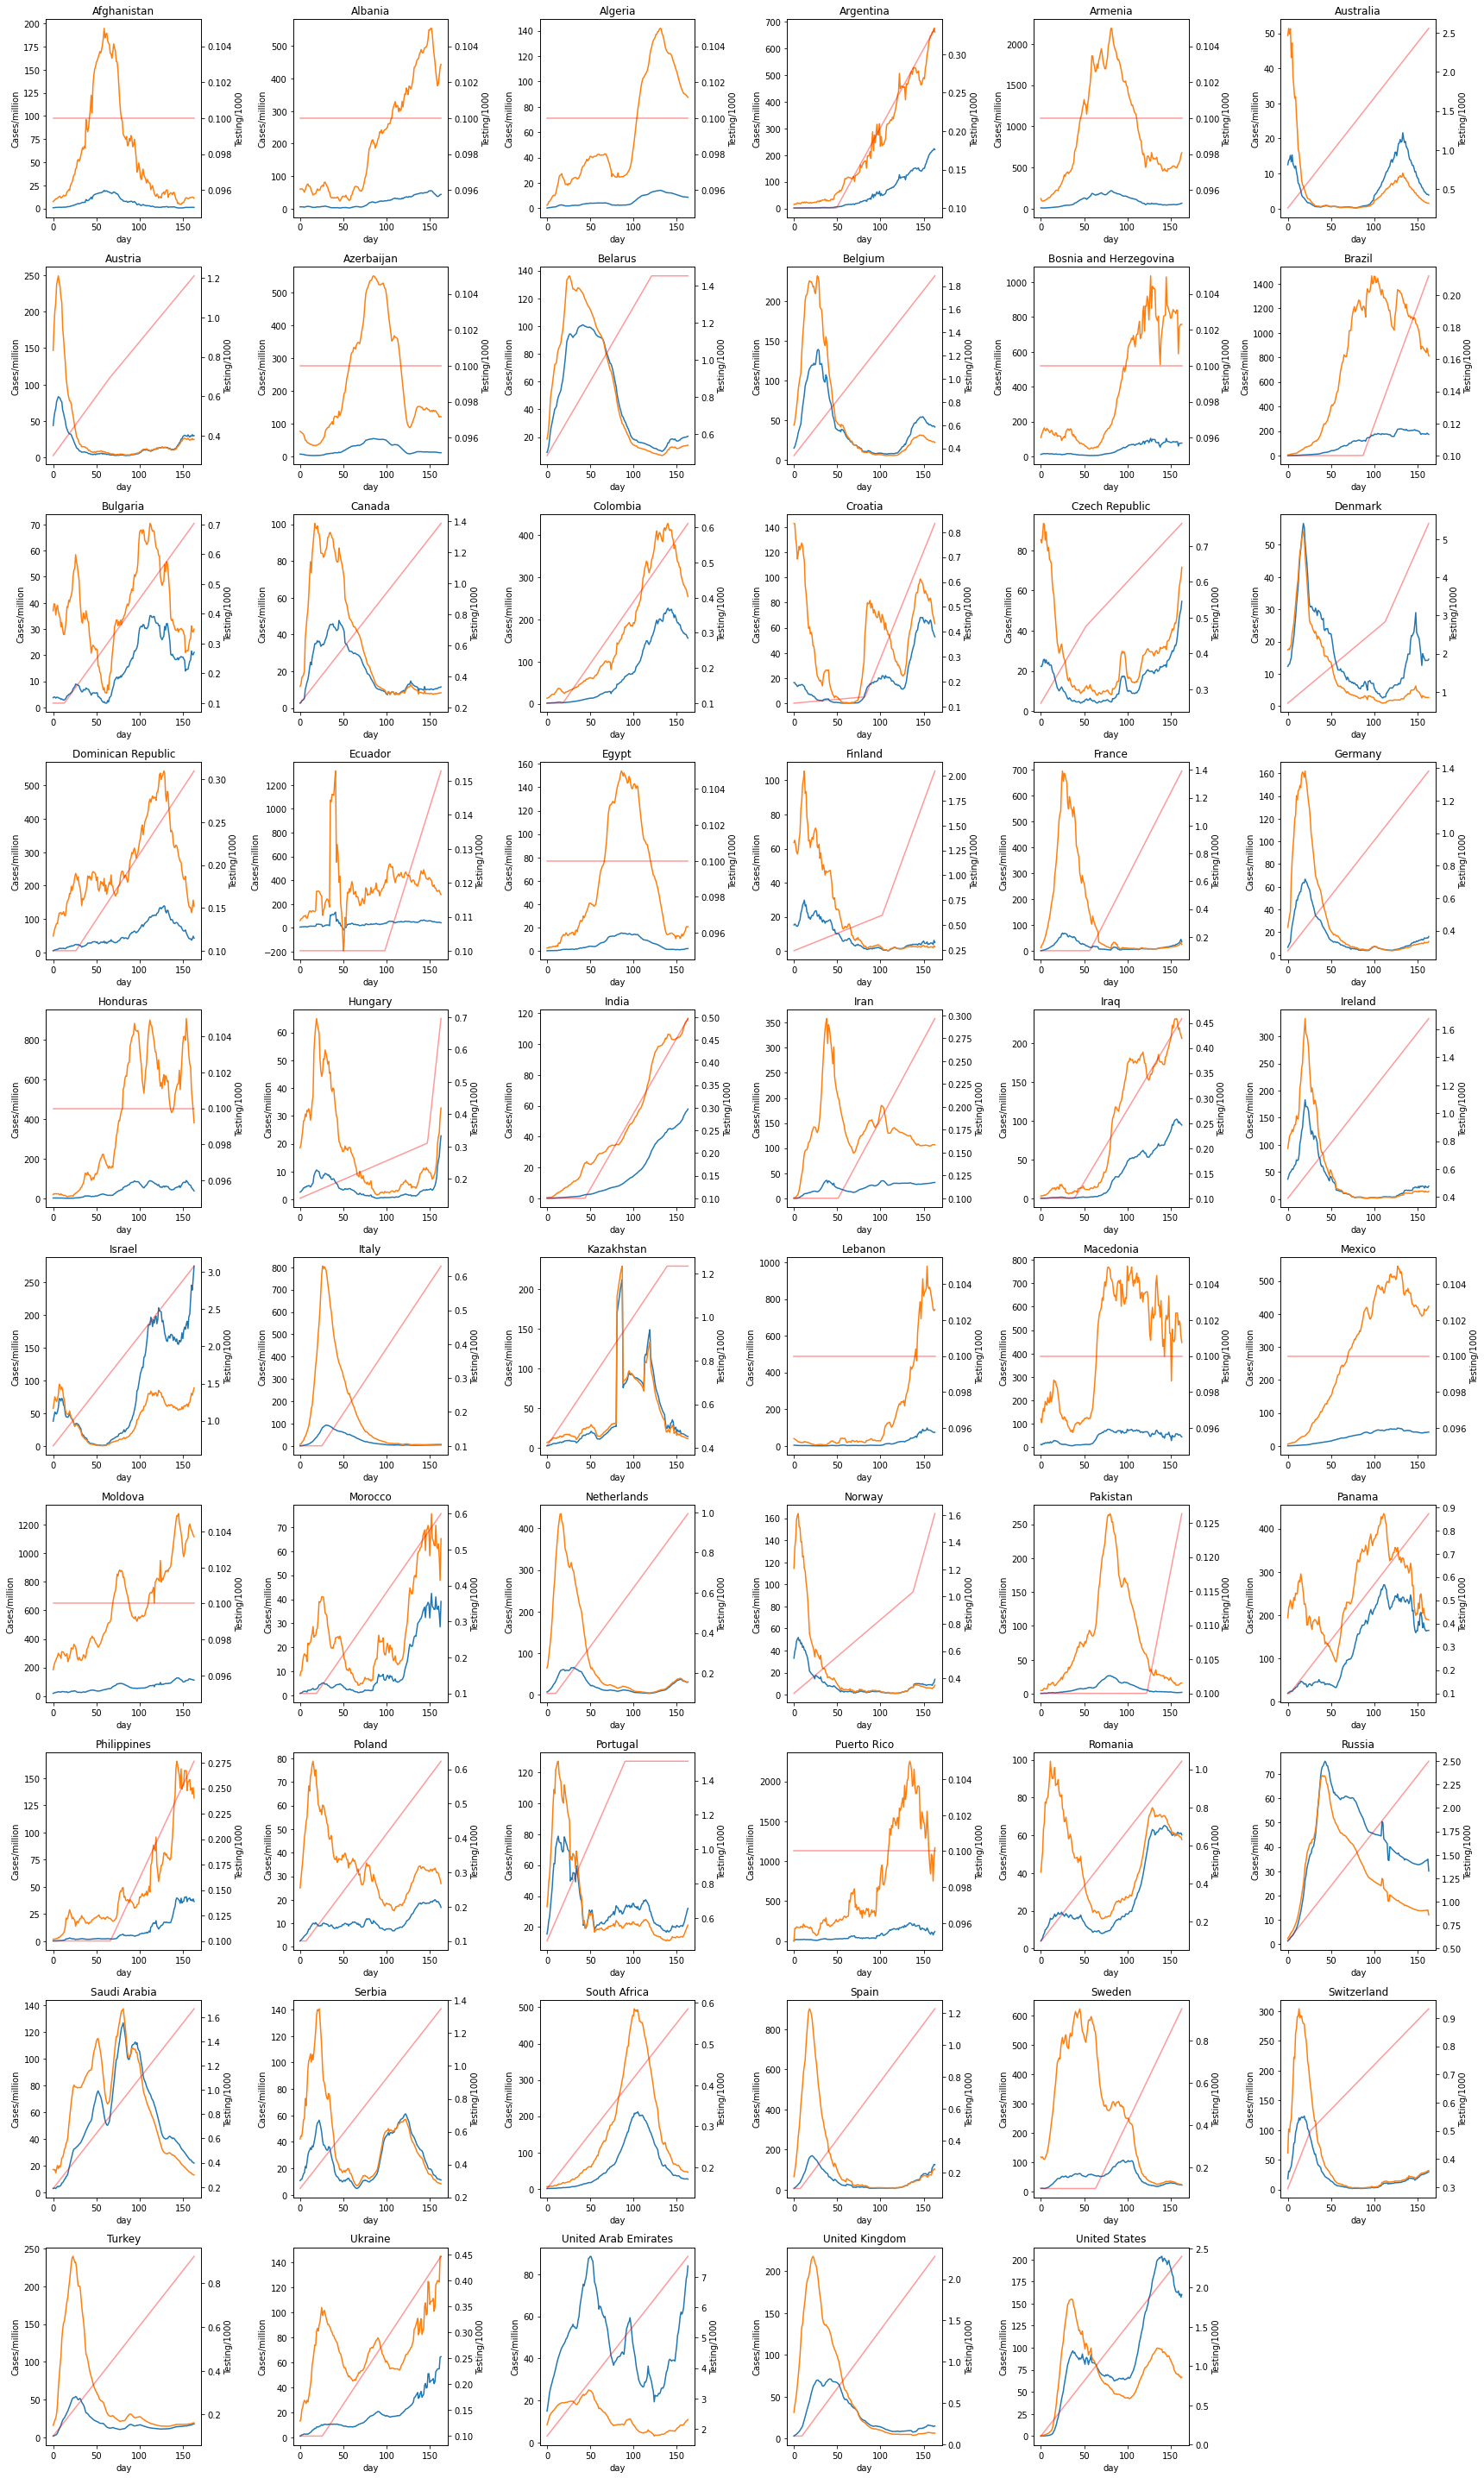

In [112]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_pwlfit'],longshort_reg_testing_c)

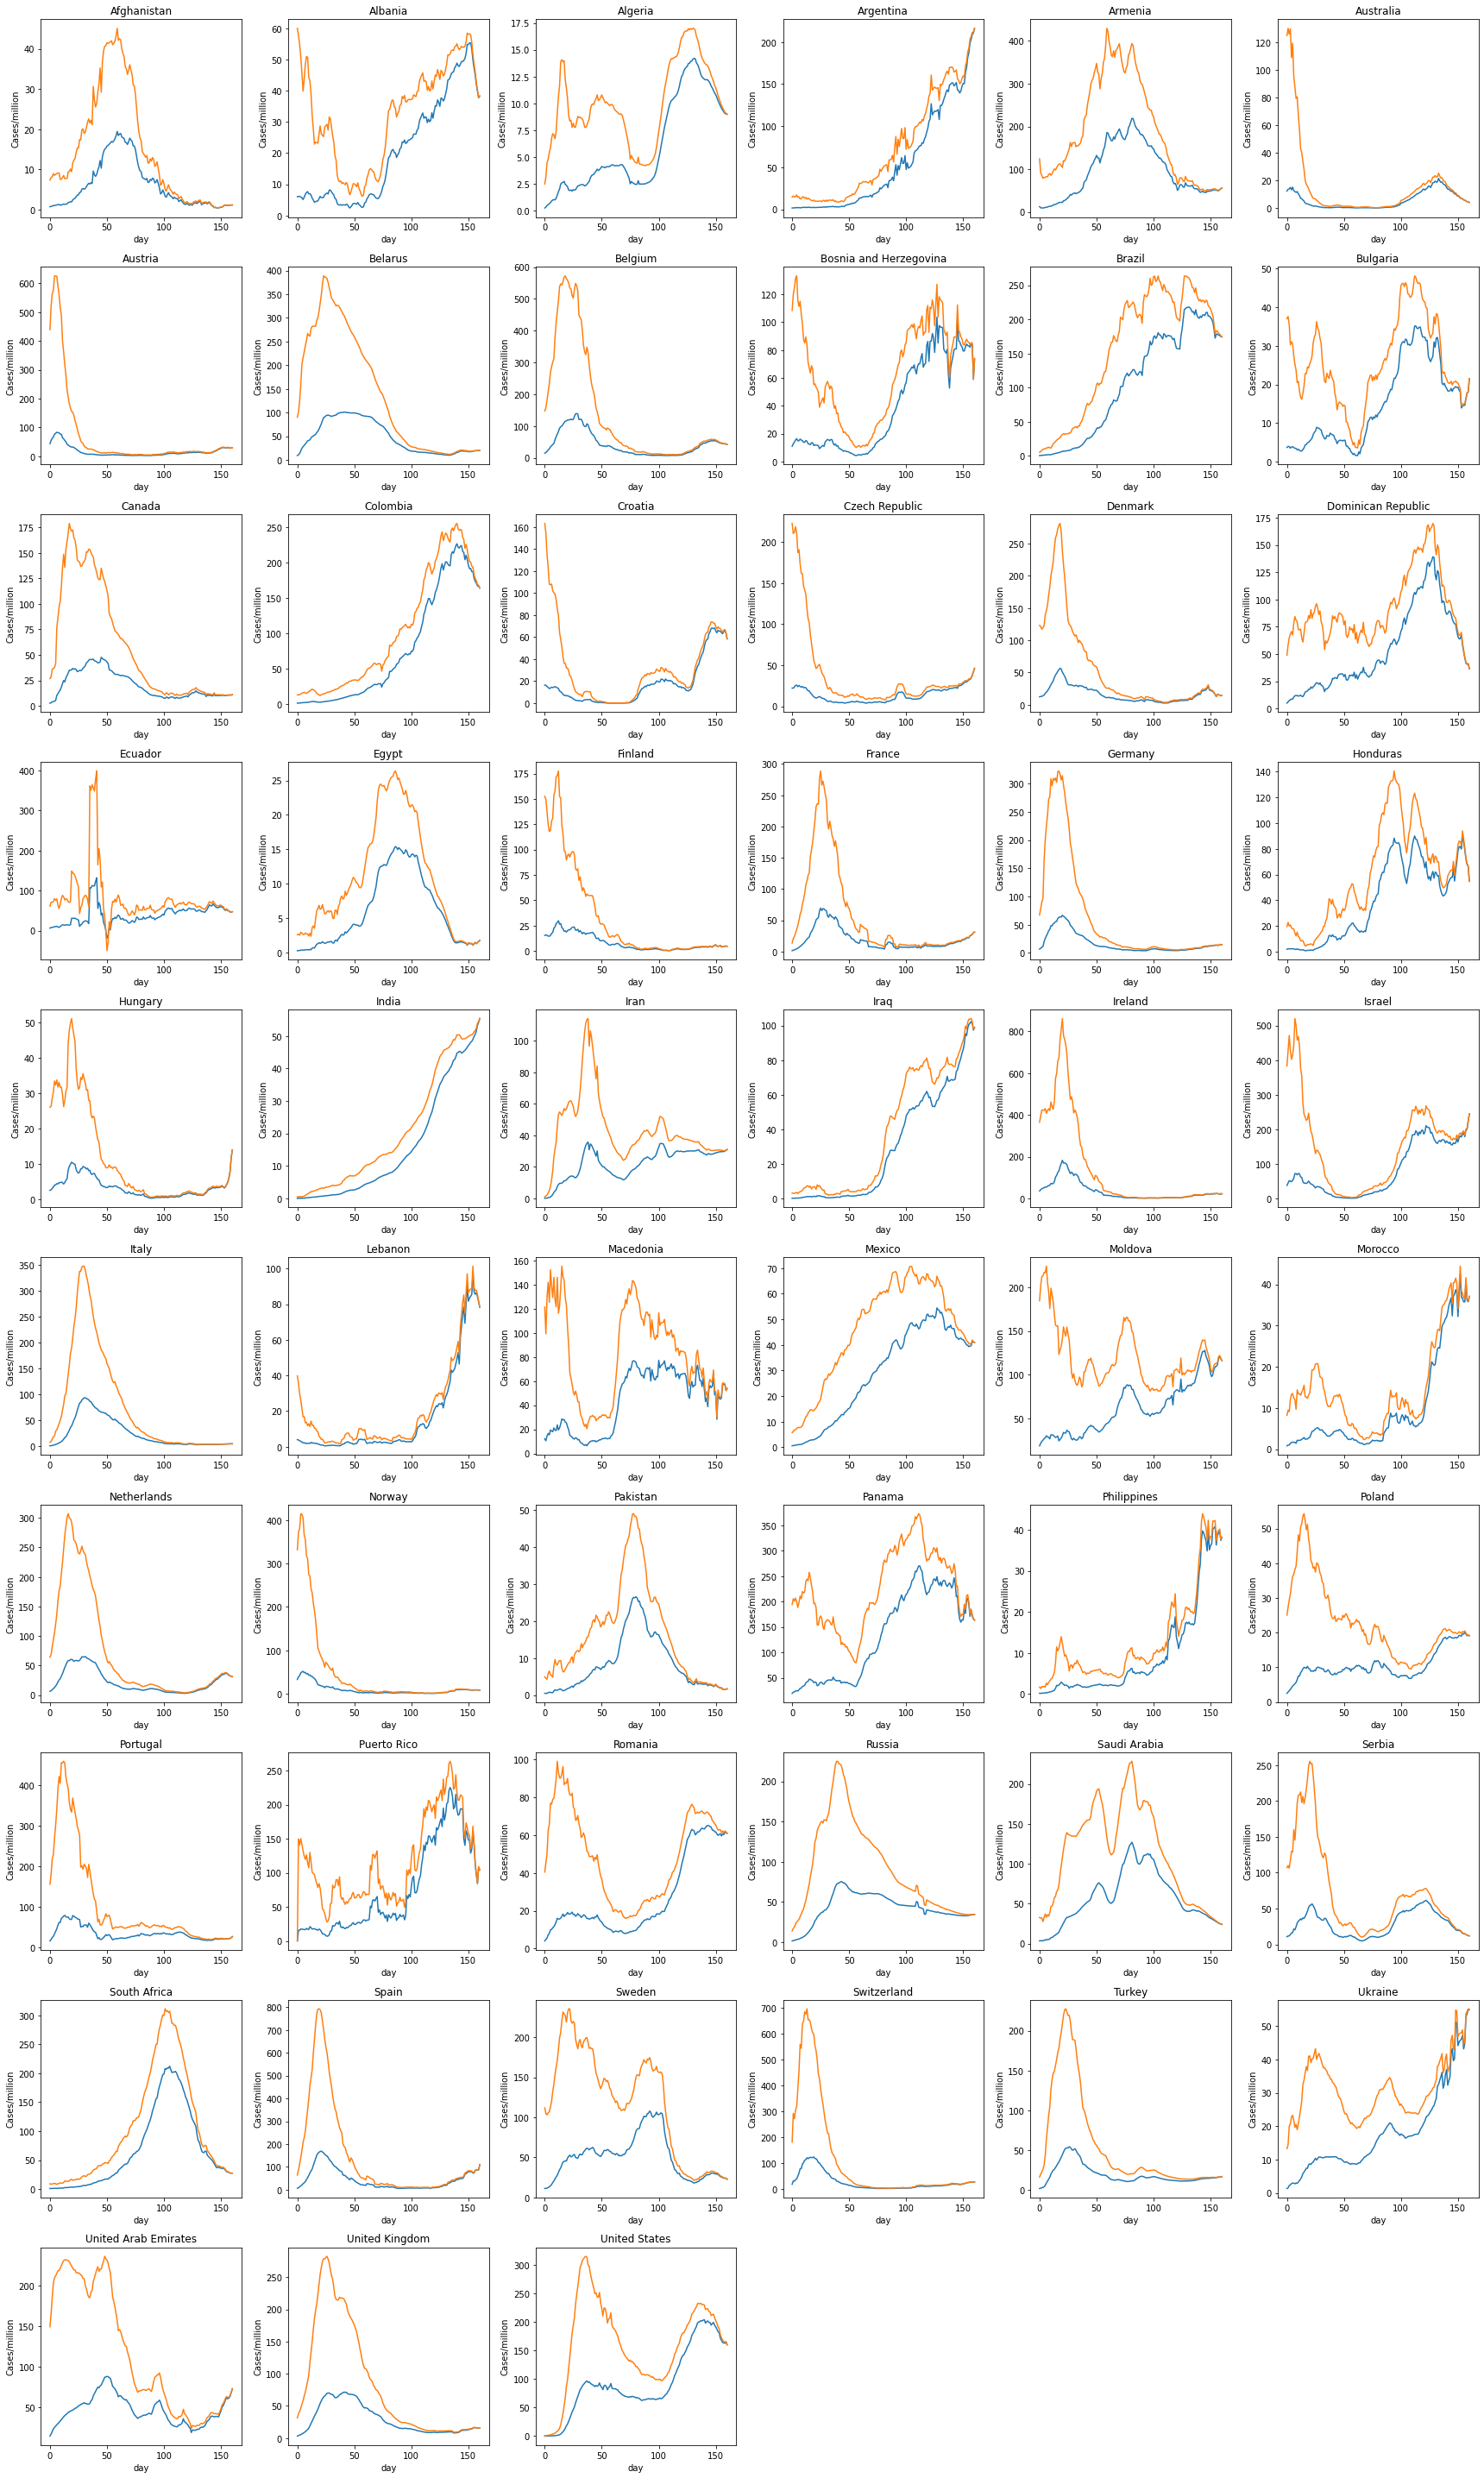

In [85]:
plot_all(lcountries,cases_raw,cases_adj_lin2020)

# Compare best clusters

In [103]:
datasets = [c for c in clusdata_all]
datasets

['deaths',
 'cases',
 'cases_lin2020',
 'cases_pwlfit',
 'cases_nonlin',
 'cases_nonlinr']

In [71]:
len(countries)

59

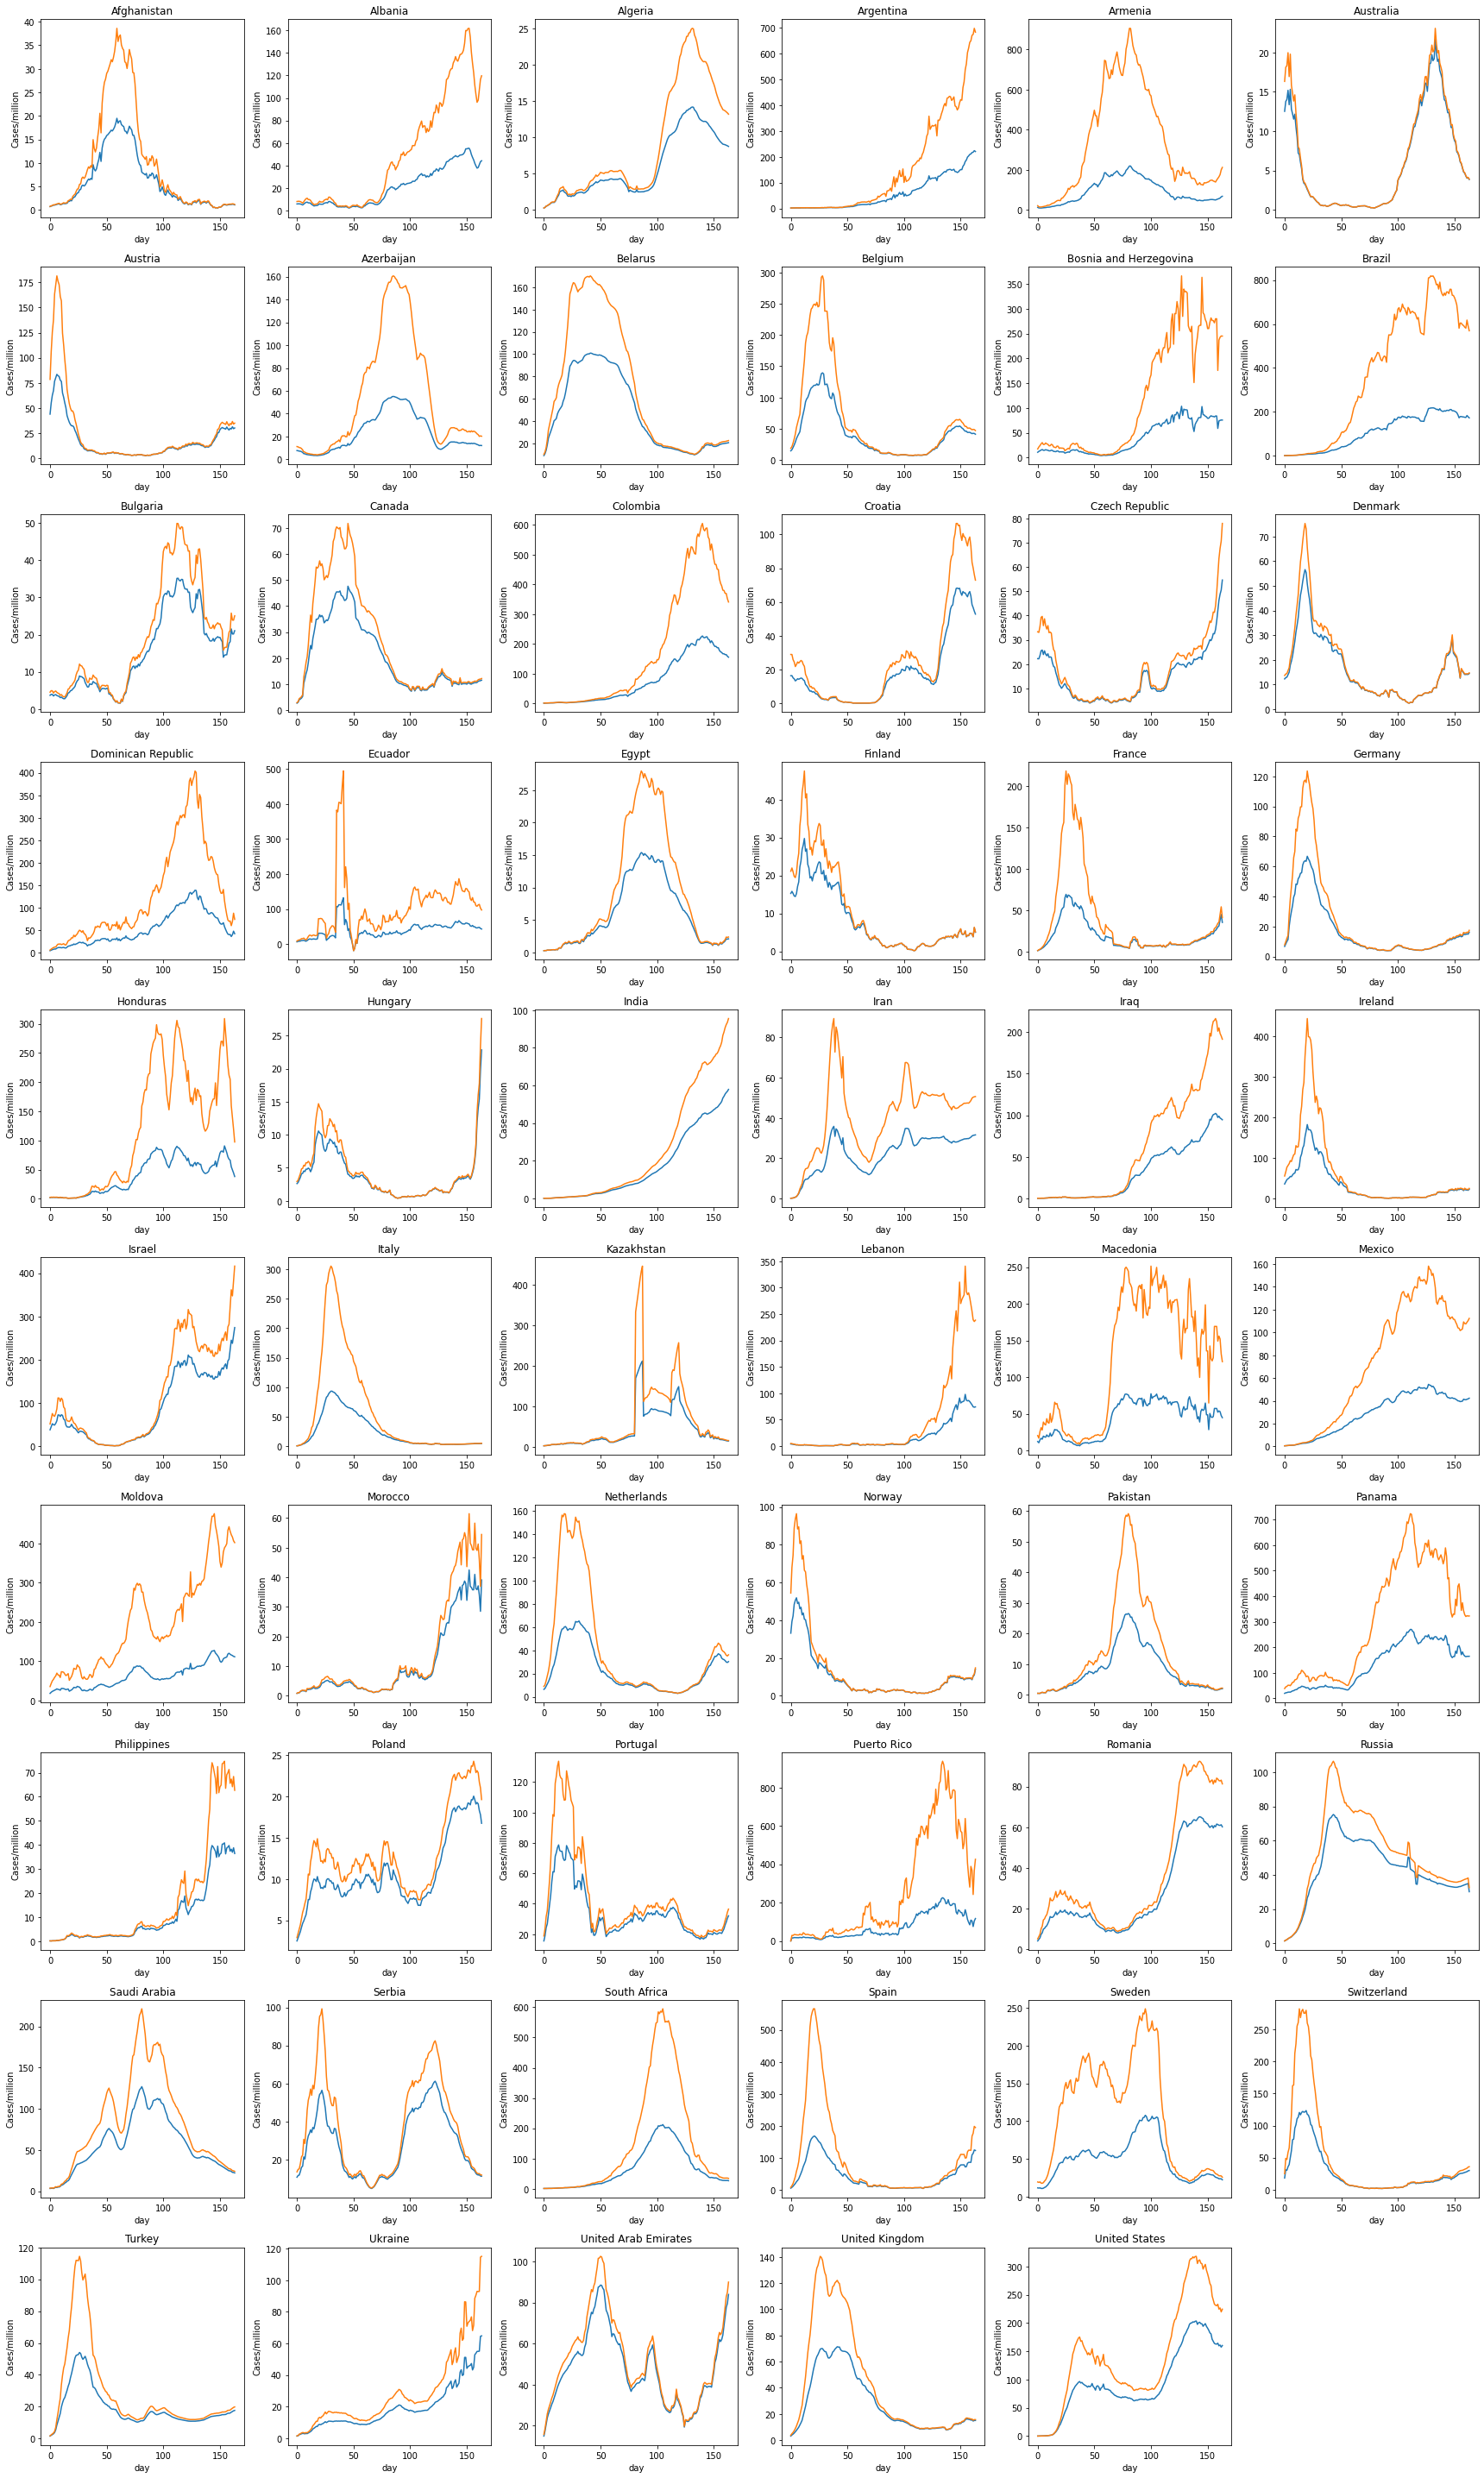

In [72]:
plot_all(countries,clusdata_all['cases'],clusdata_all['cases_nonlinr']);

In [73]:
#  Norman not sure I understand what you are printing out with "found 48 clusters of size 3" , seems wrong
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    mfit.umap_best_cluster()
    res[d] = mfit

doing  deaths ...
found 50 clusters of size 3
doing  cases ...
found 6 clusters of size 3
doing  cases_lin2020 ...
found 6 clusters of size 3
doing  cases_pwlfit ...
found 9 clusters of size 3
doing  cases_nonlin ...
found 1 clusters of size 3
doing  cases_nonlinr ...
found 1 clusters of size 3


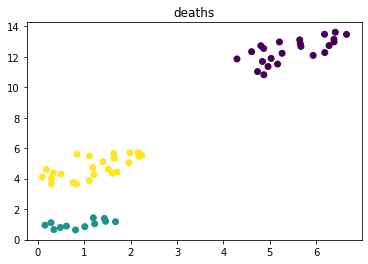

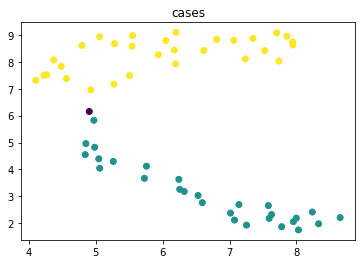

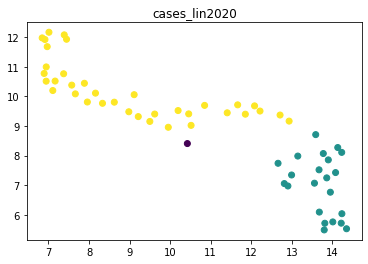

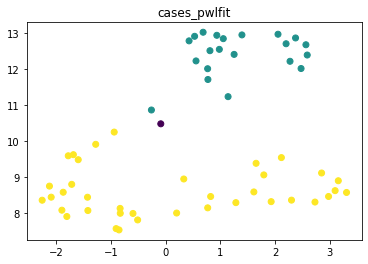

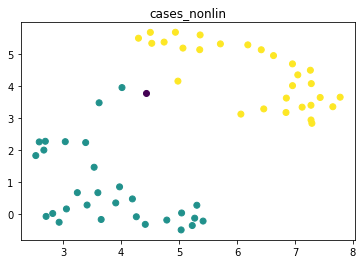

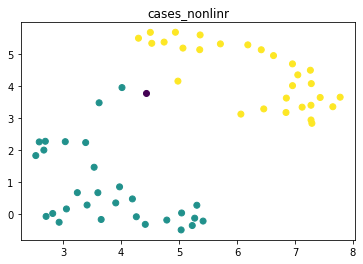

In [74]:
for rr in res:
    foo = res[rr]
    # foo.plot_umap() ########## doesn't work???
    plt.scatter(foo.um_dat[0],foo.um_dat[1],c=foo.clus_labels)
    plt.title(rr)
    plt.show()

In [100]:
def corcl(a,b):
    if len(set(a)) > 0 or len(set(b)) > 0:
        return len(set(a).intersection(set(b)))/float(len(set(a).union(set(b))))
    else:
        return 1 
    
def matchset(a,x):
    rtn = [i for i in range(len(a)) if a[i] == x]
    return rtn

def match1(a,x):
    rtn = [1 for i in range(len(a)) if a[i] == x]
    return rtn
    
def imxcor(clusters,nset,n,nclus,nclusmax=6): 
    """ finds cluster index in previous datasets d best correlated to cluster n in dataset dd
        nclus is current number of already aligned clusters
        nclusmax is max allowed number of clusters
    """
    cx = []
    cc = clusters[nset]
    for j in range(0,nset):
        c = mapclusters[j]
        klen = min(nclusmax,len(cc))
        for k in range(nclus): # find best matching previous cluster
            cx.append(np.sum(match1(cc,n)*match1(c,k))
    return argmax(cx),max(cx)

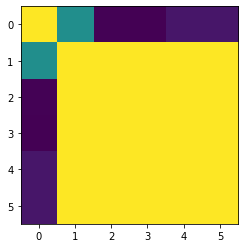

In [101]:
maxclusters = 6
clusters = [res[d].clus_labels for d in res]
ncountries = len(res['deaths'])
mapclusters = np.zeros((len(clusters),ncountries)
mapclusters[0,:] = clusters[0,:] # class lables are those of deaths to start, may be expanded
corclasses = np.zeros((len(classes),len(classes)))
c = clusters[0] # the first dataset clusters are all accepted as first clusters
nclusters = len(set(c))                    
for j in range(1,len(clusters)):
    cc = clusters[j] # clus_labels for jth dataset
                      # map clusters to best matching cluster in 0th dataset : losers try with other previous datasets : losers new
    for k in set(cc):
                       i,cor = imxcor(k,cc,nclusmax=nclasses)
                       
    corclasses[i,j] = mxcor(c,cc)
    corclasses[j,i] = corclasses[i,j]
for i in range(len(classes)):
    corclasses[i,i] = 1.0
plt.imshow(corclasses)    

In [ ]:
print([(i,c,np.mean(corclasses[i,:])) for i,c in enumerate([r for r in res])])

In [ ]:
for i in range(6):
    plt.plot(list(range(6)),corclasses[i,:])

Note: `cases_nonlin` and `cases_nonlinr` currently same.

**Cluster correlations not outstandingly high!**

In [ ]:
foo = res['cases_nonlin']

In [ ]:
def plot_adj(country, data, adj = None, testing=None,  ndays=250, axis = None):
    ndays = 250
    if testing:
        # Ntests = regtests(testing,country)  # this does not work here, since data is already synchronized, use regularized data in testing 
        Ntests = testing[country]
    if axis is None:   
        fig, ax1 = plt.subplots(figsize=(12,8))
    else:
        ax1 = axis
    ax1.plot(data[country][:ndays]) 
    if adj is not None:  # already adjusted
        ax1.plot(adj[country][:ndays])
    ax1.set_title(country)
    ax1.set_ylabel('Cases/million')
    ax1.set_xlabel('day')
    if testing:
        ax2 = ax1.twinx()
        ax2.plot(Ntests[:ndays],color='red',alpha=0.4)
        ax2.set_ylabel('Testing/1000')

        
def plot_all(countries,dat,adj=None,testing=None,ndays=250):
    max_cols=6
    max_rows=int(len(countries)/max_cols) + 1
    fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(24,4*max_rows))

    for idx, country  in enumerate(countries):
        row = idx // max_cols
        col = idx % max_cols
        plot_adj(country,dat,adj,testing,ndays,axis=axes[row,col])
    for idx in range(len(countries),max_rows*max_cols):
        row = idx // max_cols
        col = idx % max_cols
        axes[row, col].axis("off")
    #plt.subplots_adjust(wspace=.05, hspace=.05)
    fig.tight_layout()
    #for ax in fig.get_axes():
    #    ax.label_outer()
    plt.show()


In [ ]:
plt.plot(foo.smoothed[0])

In [ ]:
len(foo.dat[0,:])

In [ ]:
dat1 = {countries[i]:foo.dat[i,:] for i in range(len(countries))}
dat2 = {countries[i]:foo.smoothed[i,:] for i in range(len(countries))}
plot_all(countries,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus0 = [i for i,x in enumerate(res[cc].clus_labels) if x==0]

count0 = [countries[i] for i in clus0]
plot_all(count0,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==1]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

In [ ]:
cc = 'cases_nonlin'
clus = [i for i,x in enumerate(res[cc].clus_labels) if x==2]

count = [countries[i] for i in clus]
plot_all(count,dat1,dat2)

# Hdbscan on raw data

In [129]:
foo = list(range(10))
foo[3]='red'
foo

[0, 1, 2, 'red', 4, 5, 6, 7, 8, 9]

In [209]:
foodeath = ClusterFit(clusdata_all['deaths'])


In [210]:
foodeath.hdbscan()

cluster validity index = 0.3974509637425316
cluster validity of each cluster:
cluster 0 validity = 0.3974509637425316
cluster 0 validity = [0.31523005 0.62846683]


In [211]:
foodeath.umap(n_neighbors=4)

In [212]:
len(foodeath.clus_labels)

57

In [213]:
foodeath.clus_labels

array([ 0,  0,  0,  0,  0,  0,  1, -1,  1,  0, -1,  0,  1,  0, -1,  1,  1,
        0, -1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,
        0,  0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0, -1,  0,  1,  1,
        1,  1,  0,  1,  1, -1])

[0.8999552, 0.52042264, 4.743117, 7.544821, -0.39692667, 7.648146]
[0.8999552, 0.52042264, 4.743117, 7.544821, -0.39692667, 7.648146]


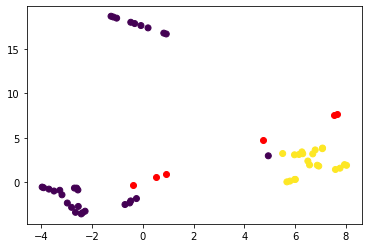

In [214]:
foodeath.plot_umap()

# hdbscan on raw PCA

In [215]:
foodeath = ClusterFit(clusdata_all['deaths'])


In [216]:
foodeath.hdbscan_pca()

shape of cluster data =  (57, 10)
cluster validity index = 0.14696131676809582
cluster validity of each cluster:
cluster -1 validity = 0.14696131676809582
cluster 1 validity = [0.20403573 0.19118141 0.01609522]


In [217]:
foodeath.umap(n_neighbors=4)

In [218]:
len(foodeath.clus_labels)

57

In [219]:
foodeath.clus_labels

array([-1,  1,  0,  1,  2,  1,  0, -1,  0,  1, -1,  1,  0,  1, -1,  0,  0,
        1, -1, -1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  1,  2,  2,
       -1,  1,  0,  0, -1,  1,  1,  0,  0,  1,  1,  2, -1, -1,  1,  0,  0,
        0,  0,  1,  0,  0, -1])

[-1.0284114, 0.8999552, 0.52042264, 4.743117, 7.544821, -0.4720986, 0.92545587, -1.1556296, -0.07119047, -0.39692667, 7.648146]
[-1.0284114, 0.8999552, 0.52042264, 4.743117, 7.544821, -0.4720986, 0.92545587, -1.1556296, -0.07119047, -0.39692667, 7.648146]


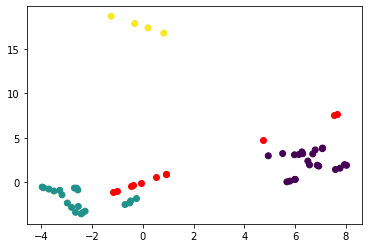

In [220]:
foodeath.plot_umap()

# FPCA

[Example](https://fda.readthedocs.io/en/latest/auto_examples/plot_fpca.html#sphx-glr-auto-examples-plot-fpca-py) of FPCA...

Also: see same example in the fpca_example notebook.

Also:  see [documentation](https://fda.readthedocs.io/en/latest/modules/preprocessing/dim_reduction/autosummary/skfda.preprocessing.dim_reduction.projection.FPCA.html?highlight=fpca) for FPCA.

## Using raw data (as discrete samples)

### Preliminary scratch...

In [221]:
dat = foodeath.dat

In [311]:
foodeath.fitted.shape

(57, 10)

In [222]:
dat.shape

(57, 161)

In [223]:
import skfda
from skfda.datasets import fetch_growth
from skfda.exploratory.visualization import plot_fpca_perturbation_graphs
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.representation.basis import BSpline, Fourier, Monomial



In [254]:
len(dat[0])

161

Configure data a samples of a function on a grid, specify the grid as list of days:

In [277]:
dat_disc = skfda.representation.grid.FDataGrid(dat,list(range(len(dat[0]))))

In [256]:
len(dat_disc)

57

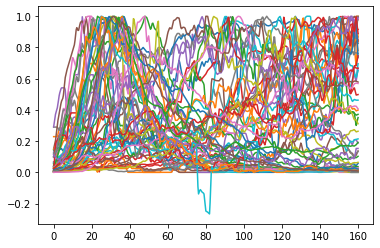

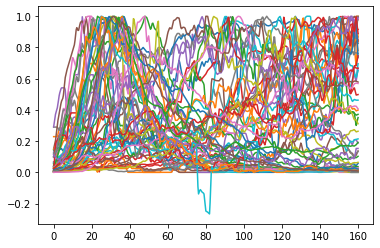

In [257]:
dat_disc.plot()

Text(0.5, 1.0, 'Spain')

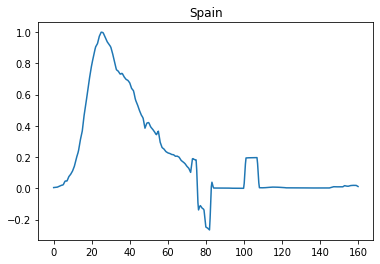

In [278]:
idx = [i for i,x in enumerate(countries) if x=="Spain"][0]
dat_disc[idx].plot()
plt.title(countries[idx])

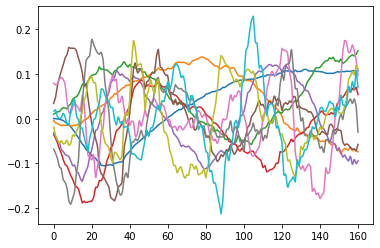

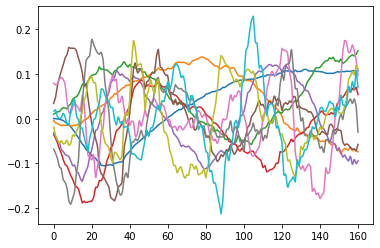

In [263]:
fpca_disc = FPCA(n_components=10)
fpca_disc.fit(dat_disc)
fpca_disc.components_.plot()


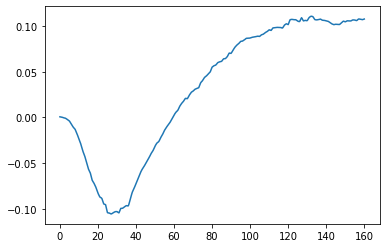

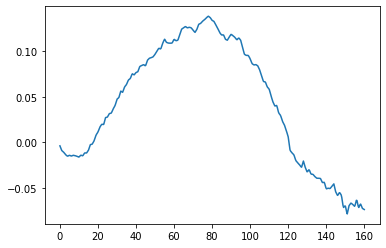

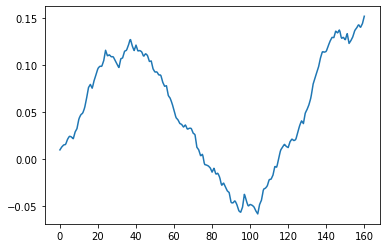

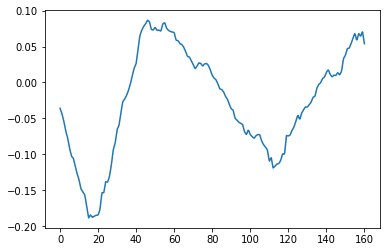

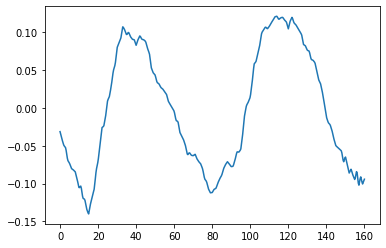

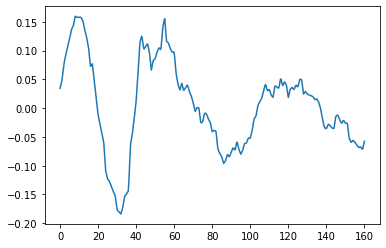

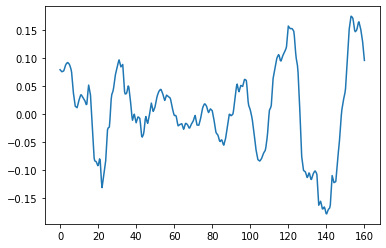

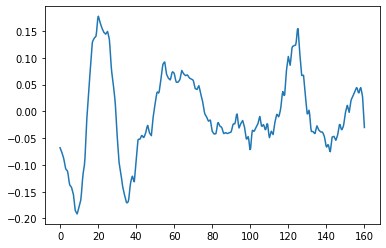

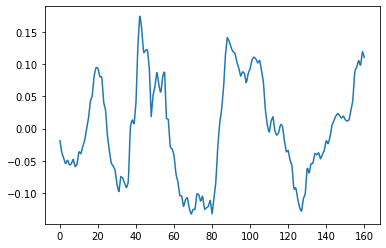

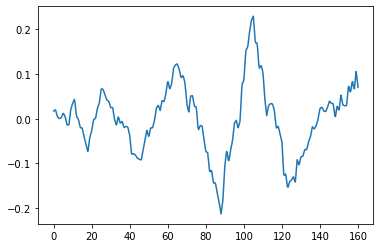

In [265]:
max_cols = 5
max_rows = len(fpca_disc.components_) // max_cols
#fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,max_rows*3.5))
for i in range(len(fpca_disc.components_)):
    row = i // max_cols
    col = i % max_cols
    #axes[row, col].axis("off")
    fpca_disc.components_[i].plot()


In [266]:
foo = fpca_disc.transform(dat_disc)

In [272]:
[x for x in dir(fpca_disc) if 'transform' in x]

['_transform_basis', '_transform_grid', 'fit_transform', 'transform']

In [276]:
type(foo)

numpy.ndarray

In [279]:
foo.shape

(57, 10)

In [313]:
foo.shape

(57, 5)

In [321]:
for minc in range(2,8):
    for ncomp in range(5,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   5 FPCAcomponents:   5 clusters;   50 clustered;   7 unclustered;  validity = 0.134
hdbscan_min_clus= 2 :   6 FPCAcomponents:   7 clusters;   49 clustered;   8 unclustered;  validity = None
hdbscan_min_clus= 2 :   7 FPCAcomponents:   5 clusters;   52 clustered;   5 unclustered;  validity = 0.35
hdbscan_min_clus= 2 :   8 FPCAcomponents:   5 clusters;   53 clustered;   4 unclustered;  validity = None
hdbscan_min_clus= 2 :   9 FPCAcomponents:   4 clusters;   53 clustered;   4 unclustered;  validity = 0.279
hdbscan_min_clus= 2 :   10 FPCAcomponents:   4 clusters;   55 clustered;   2 unclustered;  validity = 0.088
--------------------------
hdbscan_min_clus= 3 :   5 FPCAcomponents:   3 clusters;   51 clustered;   6 unclustered;  validity = 0.419
hdbscan_min_clus= 3 :   6 FPCAcomponents:   3 clusters;   51 clustered;   6 unclustered;  validity = 0.372
hdbscan_min_clus= 3 :   7 FPCAcomponents:   3 clusters;   51 clustered;   6 unclustered;  validity = 0.301
hdbscan_min_

In [330]:
min_samples = 3
for minc in range(2,8):
    for ncomp in range(3,11):
        fpca_disc = FPCA(n_components=ncomp)
        fpca_disc.fit(dat_disc)
        foo = fpca_disc.transform(dat_disc)
        clusterer = hdbscan.HDBSCAN(min_cluster_size=minc,min_samples=min_samples)
        labels = clusterer.fit_predict(foo)
        try:
            validity = hdbscan.validity.validity_index(foo, labels)
            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
                  len(set([x for x in labels if x>-1])),'clusters;  ',
                  sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',np.round(validity,3))
        except:
            validity=None

            print('hdbscan_min_clus=',minc,':  ',ncomp ,'FPCAcomponents:  ',
              len(set([x for x in labels if x>-1])),'clusters;  ',
              sum([1 for x in labels if x>-1]),'clustered;  ',sum([1 for x in labels if x==-1]),'unclustered; ','validity =',validity)
        #print(labels)

    print('--------------------------')

hdbscan_min_clus= 2 :   3 FPCAcomponents:   3 clusters;   51 clustered;   6 unclustered;  validity = 0.38
hdbscan_min_clus= 2 :   4 FPCAcomponents:   3 clusters;   48 clustered;   9 unclustered;  validity = 0.126
hdbscan_min_clus= 2 :   5 FPCAcomponents:   3 clusters;   51 clustered;   6 unclustered;  validity = 0.419
hdbscan_min_clus= 2 :   6 FPCAcomponents:   3 clusters;   51 clustered;   6 unclustered;  validity = 0.372
hdbscan_min_clus= 2 :   7 FPCAcomponents:   3 clusters;   51 clustered;   6 unclustered;  validity = 0.301
hdbscan_min_clus= 2 :   8 FPCAcomponents:   3 clusters;   50 clustered;   7 unclustered;  validity = 0.363
hdbscan_min_clus= 2 :   9 FPCAcomponents:   3 clusters;   48 clustered;   9 unclustered;  validity = 0.282
hdbscan_min_clus= 2 :   10 FPCAcomponents:   3 clusters;   48 clustered;   9 unclustered;  validity = 0.151
--------------------------
hdbscan_min_clus= 3 :   3 FPCAcomponents:   3 clusters;   51 clustered;   6 unclustered;  validity = 0.38
hdbscan_min

In [315]:
labels

array([ 0,  4,  1,  5,  0,  5,  2,  0,  2,  6,  0,  6,  2,  4, -1,  2,  2,
        6, -1,  0,  2,  2,  2, -1,  2,  4, -1,  3,  2,  6,  2,  5,  0,  0,
        0,  5,  2,  2,  0,  3, -1,  1,  2,  6,  6,  0,  0, -1,  3,  2,  2,
        2,  2, -1,  2,  2, -1])

### integrated into ClusterFit

In [335]:
foo = ClusterFit(clusdata_all['deaths'])

In [336]:
foo.hdbscan_fpca()

hdbscan_min_clus= 7 :   10 FPCAcomponents:   3 clusters;   51 clustered;   6 unclustered;  validity = 0.419


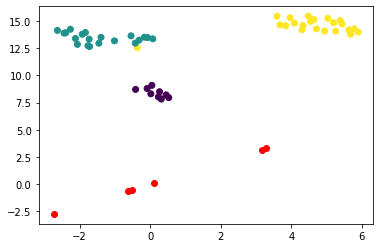

In [337]:
foo.umap()
foo.plot_umap()

## 2nd method using basis:

basis = skfda.representation.basis.BSpline(n_basis=20)
basis_dat_disc = dat_disc.to_basis(basis)
basis_dat_disc.plot()

# Clustering comparisons

Matrix density plot :
Columns : different clusterings.
Rows: the countries.

1.	Choose candidate best clustering: this determines labels of clusters
2.	Order countries by this clustering then alphabetically within cluster
3.	For this first clustering complete column with prob of country assignment being correct. Assign one of 3-6 colours to each cluster label. Shade colour intensity with prob. e.g. colours (red, green ,blue, yellow, magenta, cyan)
4.	For next clustering: firstly determine best matches of cluster index to first clustering. If more clusters than best (or for later steps those already registered), add new clusters to cluster list with new colours. Stop at 6 clusters in registered list. Members of further clusters all receive colour black with grey tone.


In [177]:
# redo all clustering compactly 
# Norman I guess you need to substitute this with dhscan
res = {}
for d in datasets:
    print('doing ',d,'...')
    mfit = ClusterFit(clusdata_all[d])
    # mfit = ClusterFit(clusdata_all[d],fft='fft') # only 2 clusters for 'deaths'
    mfit.umap_best_cluster(Nclus=3)
    res[d] = mfit

doing  deaths ...
found 50 clusters of size 3
doing  cases ...
found 6 clusters of size 3
doing  cases_lin2020 ...
found 6 clusters of size 3
doing  cases_pwlfit ...
found 9 clusters of size 3
doing  cases_nonlin ...
found 1 clusters of size 3
doing  cases_nonlinr ...
found 1 clusters of size 3


In [178]:
clus_argsort = np.lexsort((countries,res['deaths'].clus_labels))
scountries = [countries[clus_argsort[i]] for i in range(len(countries))]
probdata = np.zeros((len(res),len(countries)),dtype=np.float)
clusdata = np.zeros((len(res),len(countries)),dtype=np.integer)
for i,rr in enumerate(res):
    foo = res[rr]
    for j in range(len(scountries)):
        probdata[i,j] = foo.clus_probs[clus_argsort[j]]
        clusdata[i,j] = foo.clus_labels[clus_argsort[j]] + 1  
        
clusdata

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
        1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
        1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,
        1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1],
       [2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
        1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [179]:
# rawdata = np.random.random((10,10))              # prob of correct assignment to chosen cluster
rawdata = np.transpose(probdata)
# cindex = np.random.random_integers(0,3,(10,10))  # cluster index 
cindex = np.transpose(clusdata)
colors = np.array([[1,1,1],[1,0,0],[0,1,0],[0,0,1],[1,1,0],[0,1,1],[1,0,1]]) # black,red,green,blue,yellow,cyan,magenta
cluscols = np.transpose(colors[cindex[:,:]],(2,0,1)) # transpose to allow elementwise multiplication with rawdata with separate r,g,b
coldata = np.transpose(cluscols*rawdata,(1,2,0))   # transpose back to have colours as elements of 2D array

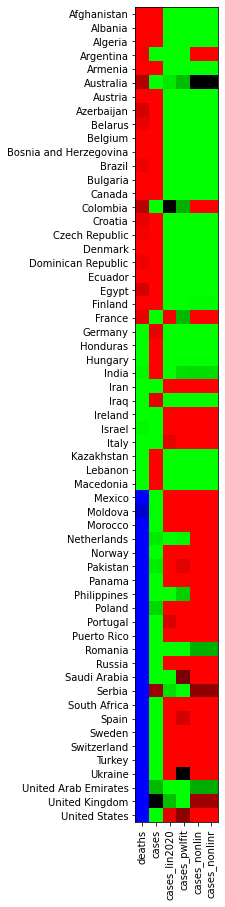

In [180]:
fig,ax = plt.subplots(1,1,figsize=(10,15))
img = ax.imshow(coldata)
ax.set_yticks(range(len(countries)))
ax.set_yticklabels(countries)
ax.set_xticks(range(len(res)))
ax.set_xticklabels(list(res),rotation='vertical')
# fig.colorbar(img)
plt.show()

Still working on mapping between clusters, so that recolor columns to best match 